**Importing Beijing Air Quality Dataset from Kaggle and Merge**

In [ ]:
import numpy as np
import os
import pandas as pd
import statistics
from math import exp
import requests
import zipfile
import io


# Replace 'url_to_your_zip_file' with the actual URL of the zipped dataset
url = "https://www.kaggle.com/api/v1/datasets/download/sid321axn/beijing-multisite-airquality-data-set"

# Fetch the zipped data
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)

# Extract the contents of the zip file
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall("temp_dataset")  # Extract to a temporary directory


# Read the CSV files into pandas DataFrames (adjust if needed for other file types)
# Prepend the 'temp_dataset/' directory to the file paths
Aotizhongxin = pd.read_csv("temp_dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Dingling = pd.read_csv("temp_dataset/PRSA_Data_Dingling_20130301-20170228.csv")
Changping = pd.read_csv("temp_dataset/PRSA_Data_Changping_20130301-20170228.csv")
Dongsi = pd.read_csv("temp_dataset/PRSA_Data_Dongsi_20130301-20170228.csv")
Guanyuan = pd.read_csv("temp_dataset/PRSA_Data_Guanyuan_20130301-20170228.csv")
Gucheng = pd.read_csv("temp_dataset/PRSA_Data_Gucheng_20130301-20170228.csv")
Huairou = pd.read_csv("temp_dataset/PRSA_Data_Huairou_20130301-20170228.csv")
Nongzhanguan = pd.read_csv("temp_dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
Shunyi = pd.read_csv("temp_dataset/PRSA_Data_Shunyi_20130301-20170228.csv")
Tiantan = pd.read_csv("temp_dataset/PRSA_Data_Tiantan_20130301-20170228.csv")
Wanliu = pd.read_csv("temp_dataset/PRSA_Data_Wanliu_20130301-20170228.csv")
Wanshouxigong = pd.read_csv("temp_dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv")


# Step 1: Merge DataFrames from all stations into a single DataFrame
all_stations_df = pd.concat([Aotizhongxin, Dingling, Changping, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong])

all_stations_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


**Data Cleaning and Column Standardization**

In [ ]:
# Step 2: Remove the 'No' column
all_stations_df = all_stations_df.drop('No', axis=1)

# Standardize column names for consistency
all_stations_df.rename(columns={
    'year': 'Year',
    'month': 'Month',
    'day': 'Day',
    'hour': 'Hour',
    'pm2.5': 'PM2.5',
    'DEWP': 'DewPoint',
    'TEMP': 'Temperature',
    'PRES': 'Pressure',
    'RAIN': 'RAIN',
    'wd': 'WindDirection',
    'WSPM': 'WindSpeed',
    'station': 'Station'
}, inplace=True)

all_stations_df.head()


,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,DewPoint,RAIN,WindDirection,WindSpeed,Station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Wind Direction Transformation to Components**

In [ ]:
# Mapping of cardinal wind directions to their corresponding degrees
wind_direction_degrees = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Function to convert wind direction to sine and cosine components
def calculate_wind_components(wind_dir):
    if wind_dir in wind_direction_degrees:
        radians = np.deg2rad(wind_direction_degrees[wind_dir])
        return np.sin(radians), np.cos(radians)
    else:
        return np.nan, np.nan

# Transform wind direction into sine and cosine components
sine_values, cosine_values = zip(*all_stations_df['WindDirection'].map(calculate_wind_components))

# Append the sine and cosine components as new columns
all_stations_df['SinWindDir'] = sine_values
all_stations_df['CosWindDir'] = cosine_values

all_stations_df.head()


,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,DewPoint,RAIN,WindDirection,WindSpeed,Station,SinWindDir,CosWindDir
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,-0.382683,0.923880
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,0.000000,1.000000
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,-0.382683,0.923880
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,-0.707107,0.707107
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,0.000000,1.000000


**Calculate Wind Direction in degrees and Add Timestamp as single Column**

In [ ]:
# Calculate wind direction in degrees from sine and cosine components
wind_direction_degrees = np.arctan2(all_stations_df['SinWindDir'], all_stations_df['CosWindDir'])

# Add the calculated wind direction (in degrees) as a new column
all_stations_df['WindDirectionDegrees'] = np.rad2deg(wind_direction_degrees)

# Create a datetime column from Year, Month, Day, and Hour columns
all_stations_df['Timestamp'] = pd.to_datetime(all_stations_df[['Year', 'Month', 'Day', 'Hour']])

all_stations_df.head()



,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,...,Pressure,DewPoint,RAIN,WindDirection,WindSpeed,Station,SinWindDir,CosWindDir,WindDirectionDegrees,Timestamp
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,...,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,-0.382683,0.923880,-22.5,2013-03-01 00:00:00
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,...,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,0.000000,1.000000,0.0,2013-03-01 01:00:00
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,...,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,-0.382683,0.923880,-22.5,2013-03-01 02:00:00
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,...,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,-0.707107,0.707107,-45.0,2013-03-01 03:00:00
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,...,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,0.000000,1.000000,0.0,2013-03-01 04:00:00


**Aggregate Data by Unique Timestamps**

In [ ]:
# Define operations to perform for each column during aggregation
column_operations = {
    'Year': 'mode',
    'Month': 'mode',
    'Day': 'mode',
    'Hour': 'mode',
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
    'Temperature': 'mean',  # Changed 'Temp' to 'Temperature'
    'Pressure': 'mean',  # Changed 'Press' to 'Pressure'
    'DewPoint': 'mean',  # Changed 'DewP' to 'DewPoint'
    'RAIN': 'mean',  # Changed 'Rain' to 'RAIN'
    'WindDirection': 'mode',
    'WindSpeed': 'mean',  # Changed 'WinSpeed' to 'WindSpeed'
    'SinWindDir': 'mean',
    'CosWindDir': 'mean',
    'WindDirectionDegrees': 'mean'
}

# Initialize a dictionary to store aggregated values
aggregated_data = {'Timestamp': []}

# Aggregate data based on unique timestamps
for timestamp in all_stations_df['Timestamp'].unique():
    subset = all_stations_df[all_stations_df['Timestamp'] == timestamp]
    aggregated_data['Timestamp'].append(timestamp)

    for column, operation in column_operations.items():
        result = None
        if operation == 'mean':
            result = subset[column].mean()
        elif operation == 'mode':
            result = statistics.mode(subset[column])

        if column in aggregated_data:
            aggregated_data[column].append(result)
        else:
            aggregated_data[column] = [result]

# Convert the aggregated dictionary to a DataFrame
aggregated_df = pd.DataFrame(aggregated_data)

# Display the first few rows of the aggregated DataFrame
aggregated_df.head()


,Timestamp,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,DewPoint,RAIN,WindDirection,WindSpeed,SinWindDir,CosWindDir,WindDirectionDegrees
0,2013-03-01 00:00:00,2013,3,1,0,5.666667,7.916667,5.666667,12.600000,308.333333,75.416667,-0.916667,1022.766667,-19.900000,0.0,NNW,4.175000,-0.296506,0.643571,-15.000
1,2013-03-01 01:00:00,2013,3,1,1,6.833333,9.833333,5.333333,13.111111,308.333333,75.750000,-1.216667,1023.191667,-19.916667,0.0,NW,3.875000,-0.249528,0.717289,-15.000
2,2013-03-01 02:00:00,2013,3,1,2,5.666667,7.250000,8.166667,12.900000,300.000000,66.000000,-1.591667,1023.325000,-21.008333,0.0,NNW,4.400000,-0.309193,0.707352,-18.750
3,2013-03-01 03:00:00,2013,3,1,3,6.000000,9.250000,5.833333,12.400000,283.333333,75.333333,-1.891667,1024.208333,-21.833333,0.0,NW,3.366667,-0.346071,0.775598,-24.375
4,2013-03-01 04:00:00,2013,3,1,4,4.833333,6.916667,6.750000,14.000000,308.333333,66.333333,-2.283333,1024.866667,-21.625000,0.0,N,2.716667,-0.340467,0.847333,-22.500


**Handle Missing Data and Prepare Features**

In [ ]:
# Check the shape of the aggregated DataFrame
print(aggregated_df.shape)


(35064, 20)


In [ ]:
# Create a copy of the DataFrame for preprocessing
processed_df = aggregated_df.copy()

# Count missing values for each column
print(processed_df.isnull().sum())

Timestamp                 0
Year                      0
Month                     0
Day                       0
Hour                      0
PM2.5                    81
PM10                     83
SO2                      87
NO2                      87
CO                      204
O3                      107
Temperature              18
Pressure                 18
DewPoint                 18
RAIN                     18
WindDirection            82
WindSpeed                12
SinWindDir               12
CosWindDir               12
WindDirectionDegrees     12
dtype: int64


In [ ]:
# List of features to apply linear interpolation
features_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temperature', 'Pressure', 'DewPoint', 'RAIN', 'WindDirection',
                           'WindSpeed', 'SinWindDir', 'CosWindDir', 'WindDirectionDegrees']

# Perform linear interpolation to fill missing values
for feature in features_to_interpolate:
    processed_df[feature].interpolate(method='linear', inplace=True)

# Check for missing values after interpolation
print(processed_df.isnull().sum())

Timestamp                0
Year                     0
Month                    0
Day                      0
Hour                     0
PM2.5                    0
PM10                     0
SO2                      0
NO2                      0
CO                       0
O3                       0
Temperature              0
Pressure                 0
DewPoint                 0
RAIN                     0
WindDirection           82
WindSpeed                0
SinWindDir               0
CosWindDir               0
WindDirectionDegrees     0
dtype: int64


<ipython-input-14-19d535116a8c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df[feature].interpolate(method='linear', inplace=True)
<ipython-input-14-19d535116a8c>:7: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  processed_df[feature].interpolate(method='linear', inplace=True)


In [ ]:
# Remove the 'WindDirection' column
processed_df = processed_df.drop(['WindDirection'], axis=1)

# Display the updated shape of the DataFrame
print(processed_df.shape)

(35064, 19)


In [ ]:
processed_df.head()

,Timestamp,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,DewPoint,RAIN,WindSpeed,SinWindDir,CosWindDir,WindDirectionDegrees
0,2013-03-01 00:00:00,2013,3,1,0,5.666667,7.916667,5.666667,12.600000,308.333333,75.416667,-0.916667,1022.766667,-19.900000,0.0,4.175000,-0.296506,0.643571,-15.000
1,2013-03-01 01:00:00,2013,3,1,1,6.833333,9.833333,5.333333,13.111111,308.333333,75.750000,-1.216667,1023.191667,-19.916667,0.0,3.875000,-0.249528,0.717289,-15.000
2,2013-03-01 02:00:00,2013,3,1,2,5.666667,7.250000,8.166667,12.900000,300.000000,66.000000,-1.591667,1023.325000,-21.008333,0.0,4.400000,-0.309193,0.707352,-18.750
3,2013-03-01 03:00:00,2013,3,1,3,6.000000,9.250000,5.833333,12.400000,283.333333,75.333333,-1.891667,1024.208333,-21.833333,0.0,3.366667,-0.346071,0.775598,-24.375
4,2013-03-01 04:00:00,2013,3,1,4,4.833333,6.916667,6.750000,14.000000,308.333333,66.333333,-2.283333,1024.866667,-21.625000,0.0,2.716667,-0.340467,0.847333,-22.500


**Calculate Air Quality Health Index (AQHI)**
The AQHI formula used in this code is based on the methodology provided by Health Canada for calculating the Air Quality Health Index (AQHI).This formula can be found in Health Canada's AQHI technical document or their official website.

In [ ]:
# Function to calculate the Air Quality Health Index (AQHI)
def compute_aqhi(row):
    o3 = row['O3']
    no2 = row['NO2']
    pm2_5 = row['PM2.5']
    # If any of the required values are NaN, return NaN for AQHI
    if pd.isna(o3) or pd.isna(no2) or pd.isna(pm2_5):
        return float('nan')
    # Applying the AQHI formula
    aqhi = (10 / 18) * 100 * ((exp(0.000871 * no2) - 1) +
                               (exp(0.000537 * o3) - 1) +
                               (exp(0.000487 * pm2_5) - 1))
    return aqhi

# Apply the AQHI calculation function to each row
processed_df['AQHI'] = processed_df.apply(compute_aqhi, axis=1)

# Display the first few rows to verify the AQHI calculation
print(processed_df[['O3', 'NO2', 'PM2.5', 'AQHI']].head())

          O3        NO2     PM2.5      AQHI
0  75.416667  12.600000  5.666667  3.062696
1  75.750000  13.111111  6.833333  3.129724
2  66.000000  12.900000  5.666667  2.785572
3  75.333333  12.400000  6.000000  3.059368
4  66.333333  14.000000  4.833333  2.827127


**Visualizing Outliers in Numeric Variables Using Boxplots**

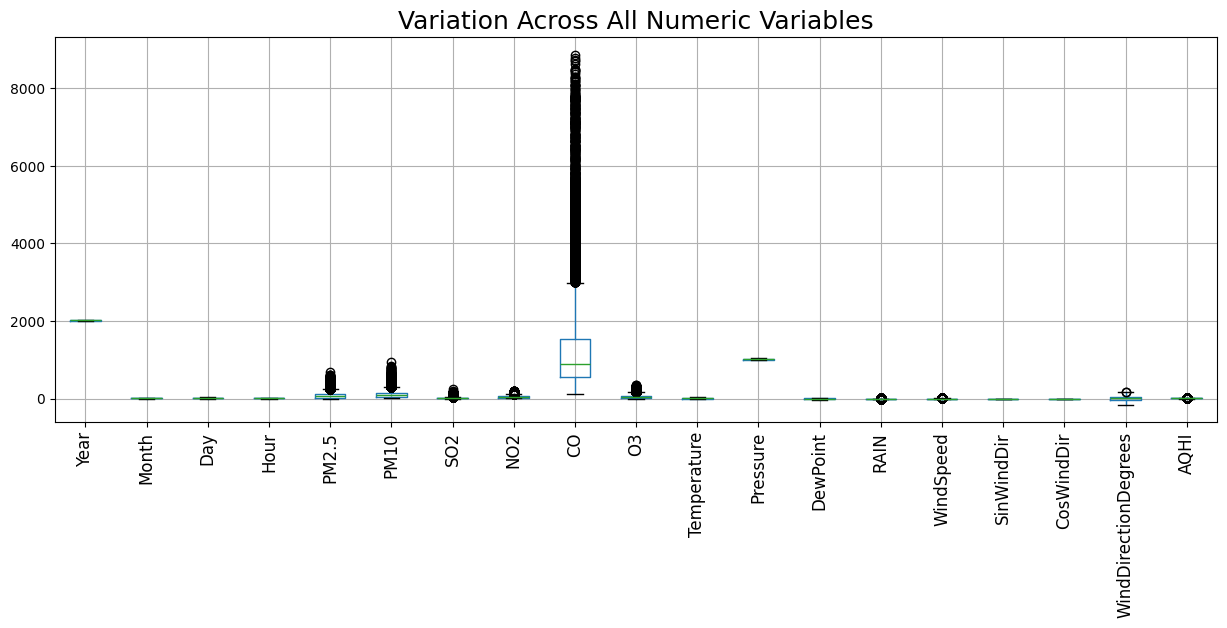

In [ ]:
# Import the necessary library
import matplotlib.pyplot as plt


# Create a copy of the original DataFrame
Processed_df_outlier = processed_df.copy()

# Select only numeric columns by excluding 'object' dtype columns
Processed_df_outlier = Processed_df_outlier.select_dtypes(exclude='object')

# Set the figure size for the plot
plt.figure(figsize=(15, 5))

# Create a boxplot to visualize outliers in all numeric variables
Processed_df_outlier.boxplot()

# Set the title and font size for the plot
plt.title('Variation Across All Numeric Variables', fontsize=18)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical', fontsize=12)

# Display the plot
plt.show()

**Outlier Treatment Using IQR for Processed Data**

In [ ]:
# Outlier Treatment Using IQR for Processed Data
print('Before: Outlier Treatment Using IQR', processed_df.shape)

# Creating a copy of the DataFrame for manipulation
processed_df_IQR = processed_df.copy()

# Selecting columns with numeric data types for outlier detection
numeric_columns = processed_df_IQR.select_dtypes(include=['float64', 'int64']).columns

# Replace outliers in each column, excluding 'RAIN'
for col in numeric_columns:
    if col != 'RAIN':  # Skipping 'RAIN' column for outlier modification
        # Calculate the first (Q1) and third quartiles (Q3) and the interquartile range (IQR)
        Q1 = processed_df_IQR[col].quantile(0.25)
        Q3 = processed_df_IQR[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outlier_mask = (processed_df_IQR[col] < lower_bound) | (processed_df_IQR[col] > upper_bound)

        # Set outliers to NaN for interpolation
        processed_df_IQR.loc[outlier_mask, col] = np.nan

        # Fill missing values by linearly interpolating between neighboring values
        processed_df_IQR[col] = processed_df_IQR[col].interpolate(method='linear', limit_direction='both')

print('After: Outliers Replaced with Neighbors Mean', processed_df_IQR.shape)


Before: Outlier Treatment Using IQR (35064, 20)
After: Outliers Replaced with Neighbors Mean (35064, 20)


**After identifying and correcting the outliers, the shape of the dataset remains unchanged. Removing outliers is not feasible in this case, as it would disrupt the time series sequence. Therefore, instead of removal, we identify the outliers and perform interpolation to replace them with appropriate values. **

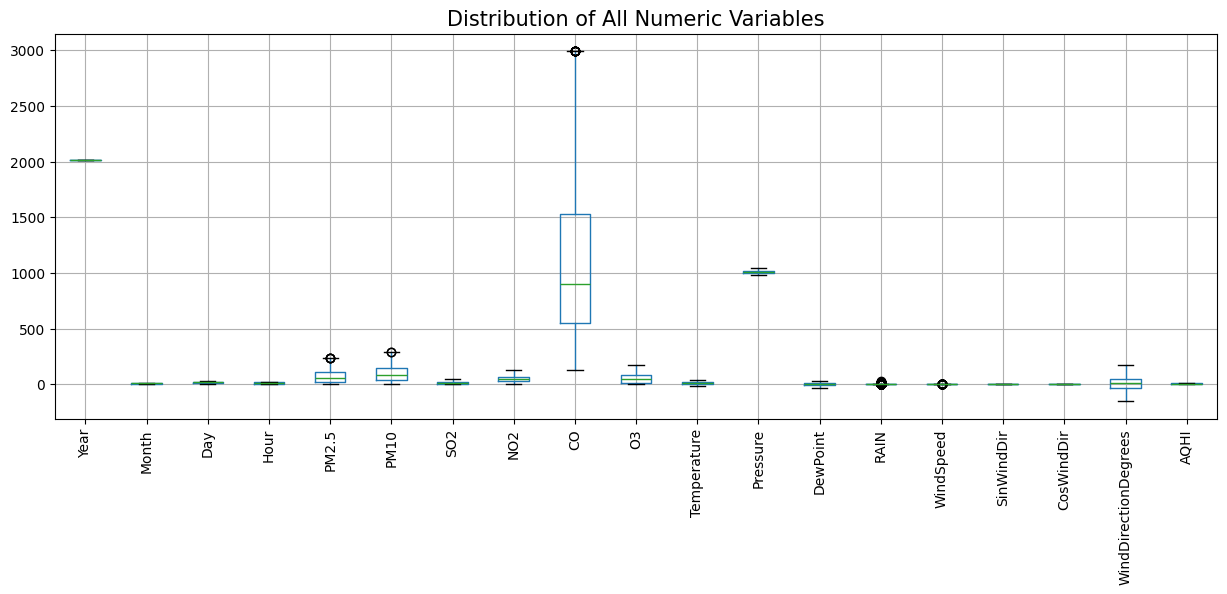

In [ ]:
# Define the figure size with specific width and height
plt.figure(figsize=(15, 5))

# Create a boxplot to illustrate the distribution and detect outliers in the numeric columns
processed_df_IQR.boxplot()

# Set the title for the plot
plt.title('Distribution of All Numeric Variables', fontsize=15)

# Adjust the x-axis labels for better readability
plt.xticks(rotation='vertical', fontsize=10)

# Show the plot
plt.show()



**Comparison of PM2.5 Data Before and After Outlier Removal**

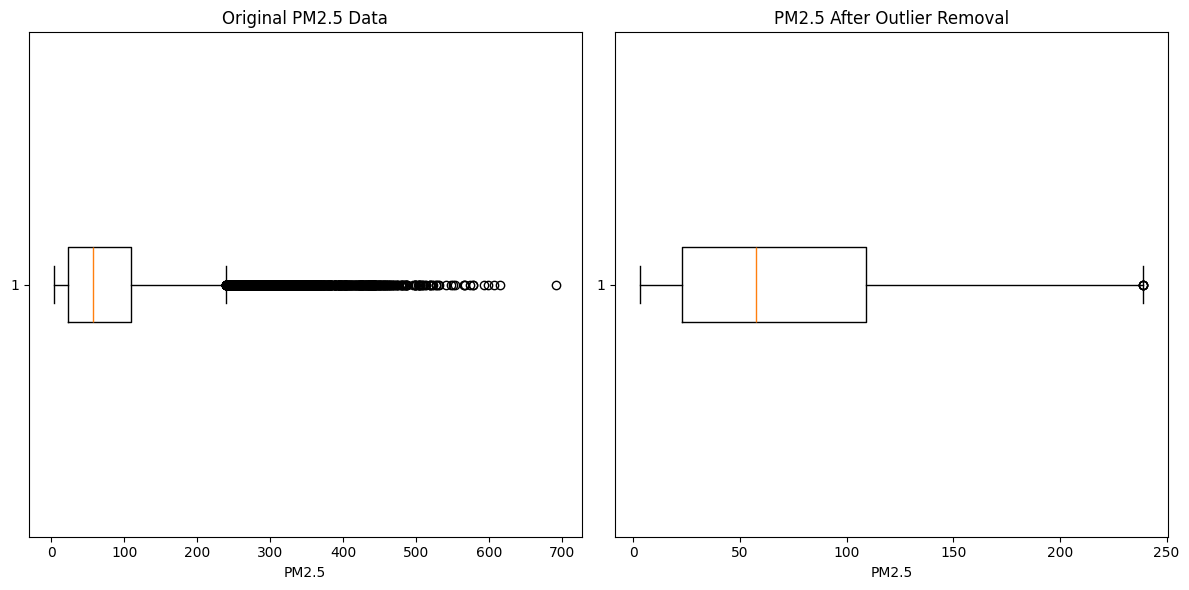

In [ ]:
import matplotlib.pyplot as plt

# Extracting the 'PM2.5' column from both the original and cleaned DataFrames for comparison
original_pm25 = processed_df['PM2.5']
cleaned_pm25 = processed_df_IQR['PM2.5']

# Creating side-by-side subplots for comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for the original PM2.5 data
axs[0].boxplot(original_pm25.dropna(), vert=False)  # Drop NaN values for proper plotting
axs[0].set_title('Original PM2.5 Data')
axs[0].set_xlabel('PM2.5')

# Box plot for the PM2.5 data after outlier correction
axs[1].boxplot(cleaned_pm25.dropna(), vert=False)  # Drop NaN values for proper plotting
axs[1].set_title('PM2.5 After Outlier Removal')
axs[1].set_xlabel('PM2.5')

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()

**Code for Cyclic Feature Normalization on Hour Column**

In [ ]:
import numpy as np

# Function to normalize cyclic features
def cyclic_normalizer(feature_column):
    max_value = feature_column.max() + 1
    normalized_data = (feature_column / max_value) * 360

    # Apply cosine function for top-bottom component
    top_bottom = np.cos(np.radians(normalized_data))
    # Apply sine function for left-right component
    left_right = np.sin(np.radians(normalized_data))

    return top_bottom, left_right

# Create a copy of the DataFrame to work on
clean_beijing_df = processed_df_IQR.copy()

# Normalize 'Hour' feature using cyclic normalizer
Hour_top_bottom, Hour_left_right = cyclic_normalizer(clean_beijing_df['Hour'])

# Add new columns for the normalized hour components
clean_beijing_df['Hour_12_06'] = Hour_top_bottom
clean_beijing_df['Hour_03_09'] = Hour_left_right

# Display the first few rows of the modified DataFrame
clean_beijing_df.head()


,Timestamp,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,...,Pressure,DewPoint,RAIN,WindSpeed,SinWindDir,CosWindDir,WindDirectionDegrees,AQHI,Hour_12_06,Hour_03_09
0,2013-03-01 00:00:00,2013.0,3.0,1.0,0.0,5.666667,7.916667,5.666667,12.600000,308.333333,...,1022.766667,-19.900000,0.0,3.875000,-0.296506,0.643571,-15.000,3.062696,1.000000,0.000000
1,2013-03-01 01:00:00,2013.0,3.0,1.0,1.0,6.833333,9.833333,5.333333,13.111111,308.333333,...,1023.191667,-19.916667,0.0,3.875000,-0.249528,0.717289,-15.000,3.129724,0.965926,0.258819
2,2013-03-01 02:00:00,2013.0,3.0,1.0,2.0,5.666667,7.250000,8.166667,12.900000,300.000000,...,1023.325000,-21.008333,0.0,3.620833,-0.309193,0.707352,-18.750,2.785572,0.866025,0.500000
3,2013-03-01 03:00:00,2013.0,3.0,1.0,3.0,6.000000,9.250000,5.833333,12.400000,283.333333,...,1024.208333,-21.833333,0.0,3.366667,-0.346071,0.775598,-24.375,3.059368,0.707107,0.707107
4,2013-03-01 04:00:00,2013.0,3.0,1.0,4.0,4.833333,6.916667,6.750000,14.000000,308.333333,...,1024.866667,-21.625000,0.0,2.716667,-0.340467,0.847333,-22.500,2.827127,0.500000,0.866025


**Code for Cyclic Feature Normalization on Month and Day Columns**

In [ ]:
# Normalize 'Month' feature using cyclic normalizer
month_sin, month_cos = cyclic_normalizer(clean_beijing_df['Month'])
clean_beijing_df['MonthSin'] = month_sin
clean_beijing_df['MonthCos'] = month_cos

# Normalize 'Day' feature using cyclic normalizer
day_sin, day_cos = cyclic_normalizer(clean_beijing_df['Day'])
clean_beijing_df['DaySin'] = day_sin
clean_beijing_df['DayCos'] = day_cos

# Display the first few rows of the modified DataFrame
clean_beijing_df.head()


,Timestamp,Year,Month,Day,Hour,PM2.5,PM10,SO2,NO2,CO,...,SinWindDir,CosWindDir,WindDirectionDegrees,AQHI,Hour_12_06,Hour_03_09,MonthSin,MonthCos,DaySin,DayCos
0,2013-03-01 00:00:00,2013.0,3.0,1.0,0.0,5.666667,7.916667,5.666667,12.600000,308.333333,...,-0.296506,0.643571,-15.000,3.062696,1.000000,0.000000,0.120537,0.992709,0.980785,0.19509
1,2013-03-01 01:00:00,2013.0,3.0,1.0,1.0,6.833333,9.833333,5.333333,13.111111,308.333333,...,-0.249528,0.717289,-15.000,3.129724,0.965926,0.258819,0.120537,0.992709,0.980785,0.19509
2,2013-03-01 02:00:00,2013.0,3.0,1.0,2.0,5.666667,7.250000,8.166667,12.900000,300.000000,...,-0.309193,0.707352,-18.750,2.785572,0.866025,0.500000,0.120537,0.992709,0.980785,0.19509
3,2013-03-01 03:00:00,2013.0,3.0,1.0,3.0,6.000000,9.250000,5.833333,12.400000,283.333333,...,-0.346071,0.775598,-24.375,3.059368,0.707107,0.707107,0.120537,0.992709,0.980785,0.19509
4,2013-03-01 04:00:00,2013.0,3.0,1.0,4.0,4.833333,6.916667,6.750000,14.000000,308.333333,...,-0.340467,0.847333,-22.500,2.827127,0.500000,0.866025,0.120537,0.992709,0.980785,0.19509


**Visualization of the Cyclic Normalization of the 'Month' Feature**

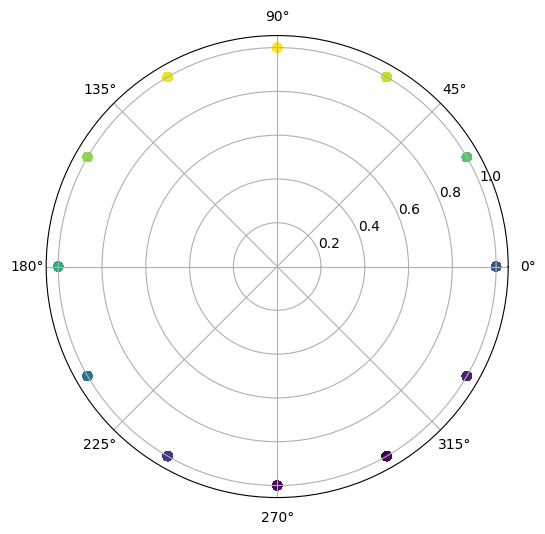

In [ ]:
# Create a polar plot for visualizing the cyclic nature of the 'Month' feature
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))

# Convert the 'Month' values to radians and plot as a scatter, color-coded by the 'MonthCos' values
angles = np.radians(clean_beijing_df['Month'] * 30)
ax.scatter(angles, np.ones(len(clean_beijing_df)), c=clean_beijing_df['MonthCos'], cmap='viridis')

# Display the plot
plt.show()


**Removing Specific Columns and Setting Timestamp as Index**

In [ ]:
# Drop the specified columns and update the DataFrame
clean_beijing_df_drop = clean_beijing_df.drop(columns=['Hour', 'Day', 'Month', 'Year'])

# Set 'Date' as the index for the modified DataFrame
clean_beijing_df_drop.set_index('Timestamp', inplace=True)


**Adding Day of the Week and Weekends Features**

In [ ]:
# Extract the day of the week from the index and assign it to a new column
clean_beijing_df_drop['Day_of_Week'] = clean_beijing_df_drop.index.weekday

# Create a 'Weekends' column indicating weekends (Saturday and Sunday) as 1, else 0
clean_beijing_df_drop['Weekends'] = (clean_beijing_df_drop['Day_of_Week'].isin([5, 6])).astype(int)

**Identifying and Labeling Holidays in the Dataset**


In [ ]:
!pip install holidays
import holidays

# Define the range of years for which holidays are to be retrieved
years = list(range(2013, 2018))

# Generate a collection of Beijing holidays for the specified years
beijing_holidays = holidays.CountryHoliday('CN', years=years)

# Extract the holiday dates into a list
holiday_dates = list(beijing_holidays.keys())

# Convert the holiday dates to pandas Timestamps for compatibility with the DataFrame index
formatted_holidays = [pd.Timestamp(date) for date in holiday_dates]

# Map each date in the DataFrame index to determine if it is a holiday (1 for holiday, 0 otherwise)
clean_beijing_df_drop['Is_Holiday'] = clean_beijing_df_drop.index.map(
    lambda date: 1 if date in formatted_holidays else 0
)

# Display the updated DataFrame
clean_beijing_df_drop.head()

,PM2.5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,DewPoint,RAIN,...,AQHI,Hour_12_06,Hour_03_09,MonthSin,MonthCos,DaySin,DayCos,Day_of_Week,Weekends,Is_Holiday
Timestamp,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,5.666667,7.916667,5.666667,12.600000,308.333333,75.416667,-0.916667,1022.766667,-19.900000,0.0,...,3.062696,1.000000,0.000000,0.120537,0.992709,0.980785,0.19509,4,0,0
2013-03-01 01:00:00,6.833333,9.833333,5.333333,13.111111,308.333333,75.750000,-1.216667,1023.191667,-19.916667,0.0,...,3.129724,0.965926,0.258819,0.120537,0.992709,0.980785,0.19509,4,0,0
2013-03-01 02:00:00,5.666667,7.250000,8.166667,12.900000,300.000000,66.000000,-1.591667,1023.325000,-21.008333,0.0,...,2.785572,0.866025,0.500000,0.120537,0.992709,0.980785,0.19509,4,0,0
2013-03-01 03:00:00,6.000000,9.250000,5.833333,12.400000,283.333333,75.333333,-1.891667,1024.208333,-21.833333,0.0,...,3.059368,0.707107,0.707107,0.120537,0.992709,0.980785,0.19509,4,0,0
2013-03-01 04:00:00,4.833333,6.916667,6.750000,14.000000,308.333333,66.333333,-2.283333,1024.866667,-21.625000,0.0,...,2.827127,0.500000,0.866025,0.120537,0.992709,0.980785,0.19509,4,0,0


**Mapping Months to Seasons and Encoding Seasonal Data**

In [ ]:
# Define a function to map each month to its respective season
def map_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Create a 'Season' column by applying the mapping function to the month values
clean_beijing_df_drop['Season'] = clean_beijing_df_drop.index.month.map(map_to_season)

# Apply one-hot encoding to the 'Season' column to convert it into binary indicators
clean_beijing_df_drop_encoded = pd.get_dummies(clean_beijing_df_drop, columns=['Season'])

# Display the updated DataFrame with encoded season columns
clean_beijing_df_drop_encoded.head()


,PM2.5,PM10,SO2,NO2,CO,O3,Temperature,Pressure,DewPoint,RAIN,...,MonthCos,DaySin,DayCos,Day_of_Week,Weekends,Is_Holiday,Season_Fall,Season_Spring,Season_Summer,Season_Winter
Timestamp,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,5.666667,7.916667,5.666667,12.600000,308.333333,75.416667,-0.916667,1022.766667,-19.900000,0.0,...,0.992709,0.980785,0.19509,4,0,0,False,True,False,False
2013-03-01 01:00:00,6.833333,9.833333,5.333333,13.111111,308.333333,75.750000,-1.216667,1023.191667,-19.916667,0.0,...,0.992709,0.980785,0.19509,4,0,0,False,True,False,False
2013-03-01 02:00:00,5.666667,7.250000,8.166667,12.900000,300.000000,66.000000,-1.591667,1023.325000,-21.008333,0.0,...,0.992709,0.980785,0.19509,4,0,0,False,True,False,False
2013-03-01 03:00:00,6.000000,9.250000,5.833333,12.400000,283.333333,75.333333,-1.891667,1024.208333,-21.833333,0.0,...,0.992709,0.980785,0.19509,4,0,0,False,True,False,False
2013-03-01 04:00:00,4.833333,6.916667,6.750000,14.000000,308.333333,66.333333,-2.283333,1024.866667,-21.625000,0.0,...,0.992709,0.980785,0.19509,4,0,0,False,True,False,False


**Holiday vs. Non-Holiday Analysis of AQHI**

Is_Holiday
0    6.416485
1    6.487414
Name: AQHI, dtype: float64


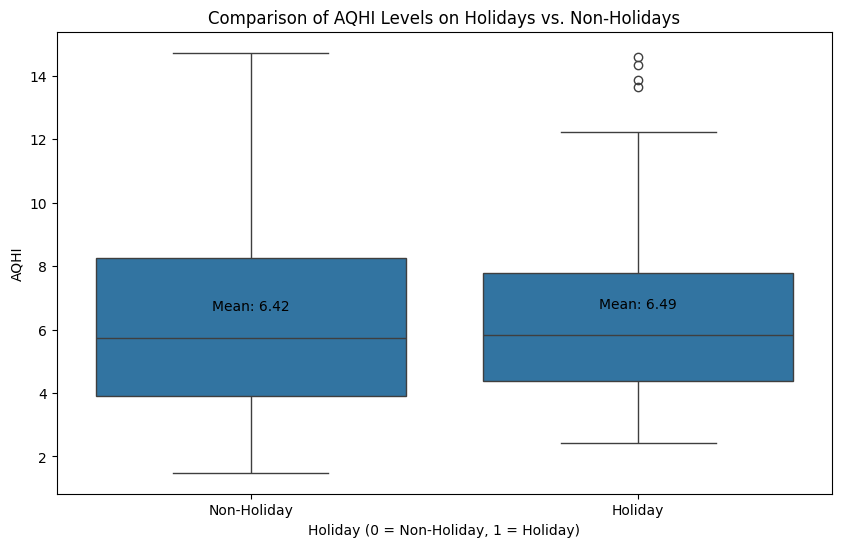

In [ ]:
!pip install seaborn
import seaborn as sns

# Compute the average AQHI values for holidays and non-holidays
mean_values = clean_beijing_df_drop.groupby('Is_Holiday')['AQHI'].mean()

# Display the calculated mean values
print(mean_values)

# Initialize the plot with custom dimensions
plt.figure(figsize=(10, 6))

# Create a boxplot comparing AQHI during holidays and non-holidays
sns.boxplot(x='Is_Holiday', y='AQHI', data=clean_beijing_df_drop, showmeans=False)

# Add titles and axis labels
plt.title('Comparison of AQHI Levels on Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('AQHI')

# Customize the x-axis labels for clarity
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])

# Annotate the plot with mean values
for i, mean_value in enumerate(mean_values):
    plt.text(i, mean_value + 0.1, f'Mean: {mean_value:.2f}', ha='center', va='bottom')

# Display the finalized plot
plt.show()

**Weekly Analysis of AQHI Levels**

Day_of_Week
0    6.170491
1    6.328575
2    6.351776
3    6.360747
4    6.536232
5    6.719254
6    6.448943
Name: AQHI, dtype: float64


<ipython-input-31-76a648dddb1f>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Day_of_Week', y='AQHI', data=clean_beijing_df_drop, ci=None)


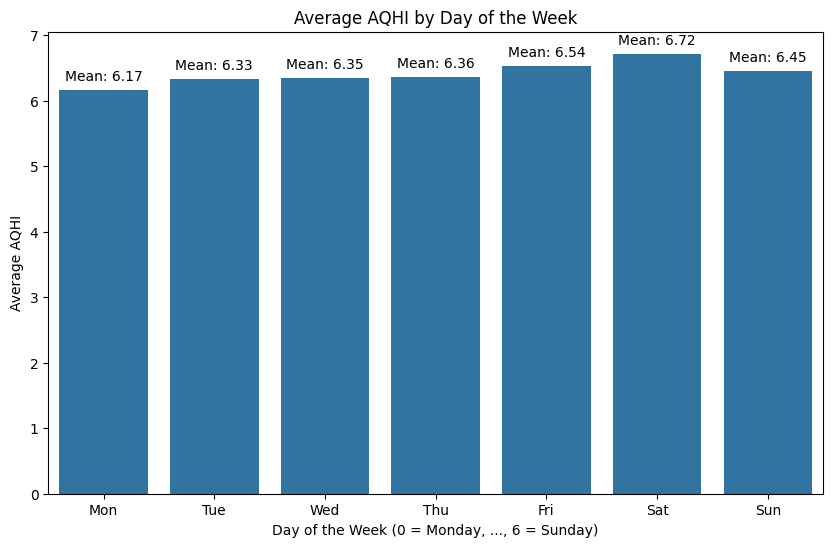

In [ ]:
# Compute average AQHI values for each day of the week
mean_values_weekday = clean_beijing_df_drop.groupby('Day_of_Week')['AQHI'].mean()

# Print the computed mean values
print(mean_values_weekday)

# Set up the plot with specified dimensions
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the average AQHI for each weekday
ax = sns.barplot(x='Day_of_Week', y='AQHI', data=clean_beijing_df_drop, ci=None)

# Add a title and axis labels
ax.set_title('Average AQHI by Day of the Week')
ax.set_xlabel('Day of the Week (0 = Monday, ..., 6 = Sunday)')
ax.set_ylabel('Average AQHI')

# Customize x-axis labels to show abbreviated weekday names
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Annotate the bar plot with mean AQHI values for clarity
for i, mean_value in enumerate(mean_values_weekday):
    plt.text(i, mean_value + 0.1, f'Mean: {mean_value:.2f}', ha='center', va='bottom')

# Display the final plot
plt.show()


**Seasonal Analysis of AQHI Levels**

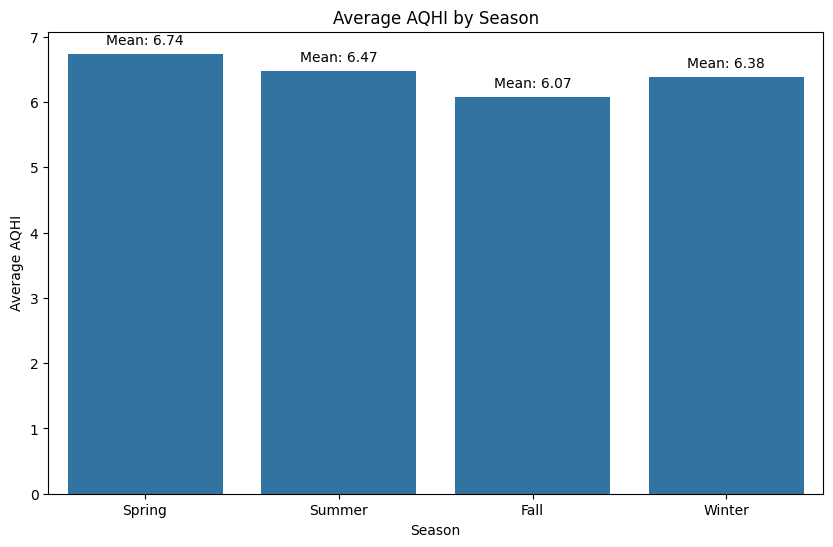

In [ ]:
# Calculate the mean AQHI values for each season and order them appropriately
seasonal_data = clean_beijing_df_drop.groupby('Season')['AQHI'].mean().reindex(['Spring', 'Summer', 'Fall', 'Winter'])

# Set up the plot with specified dimensions
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize the average AQHI for each season
ax = sns.barplot(x=seasonal_data.index, y=seasonal_data.values)

# Add a title and axis labels
ax.set_title('Average AQHI by Season')
ax.set_xlabel('Season')
ax.set_ylabel('Average AQHI')

# Annotate the bar plot with mean AQHI values for clarity
for i, mean_value in enumerate(seasonal_data.values):
    plt.text(i, mean_value + 0.1, f'Mean: {mean_value:.2f}', ha='center', va='bottom')

# Display the final plot
plt.show()


**Heatmap of Correlation Matrix**

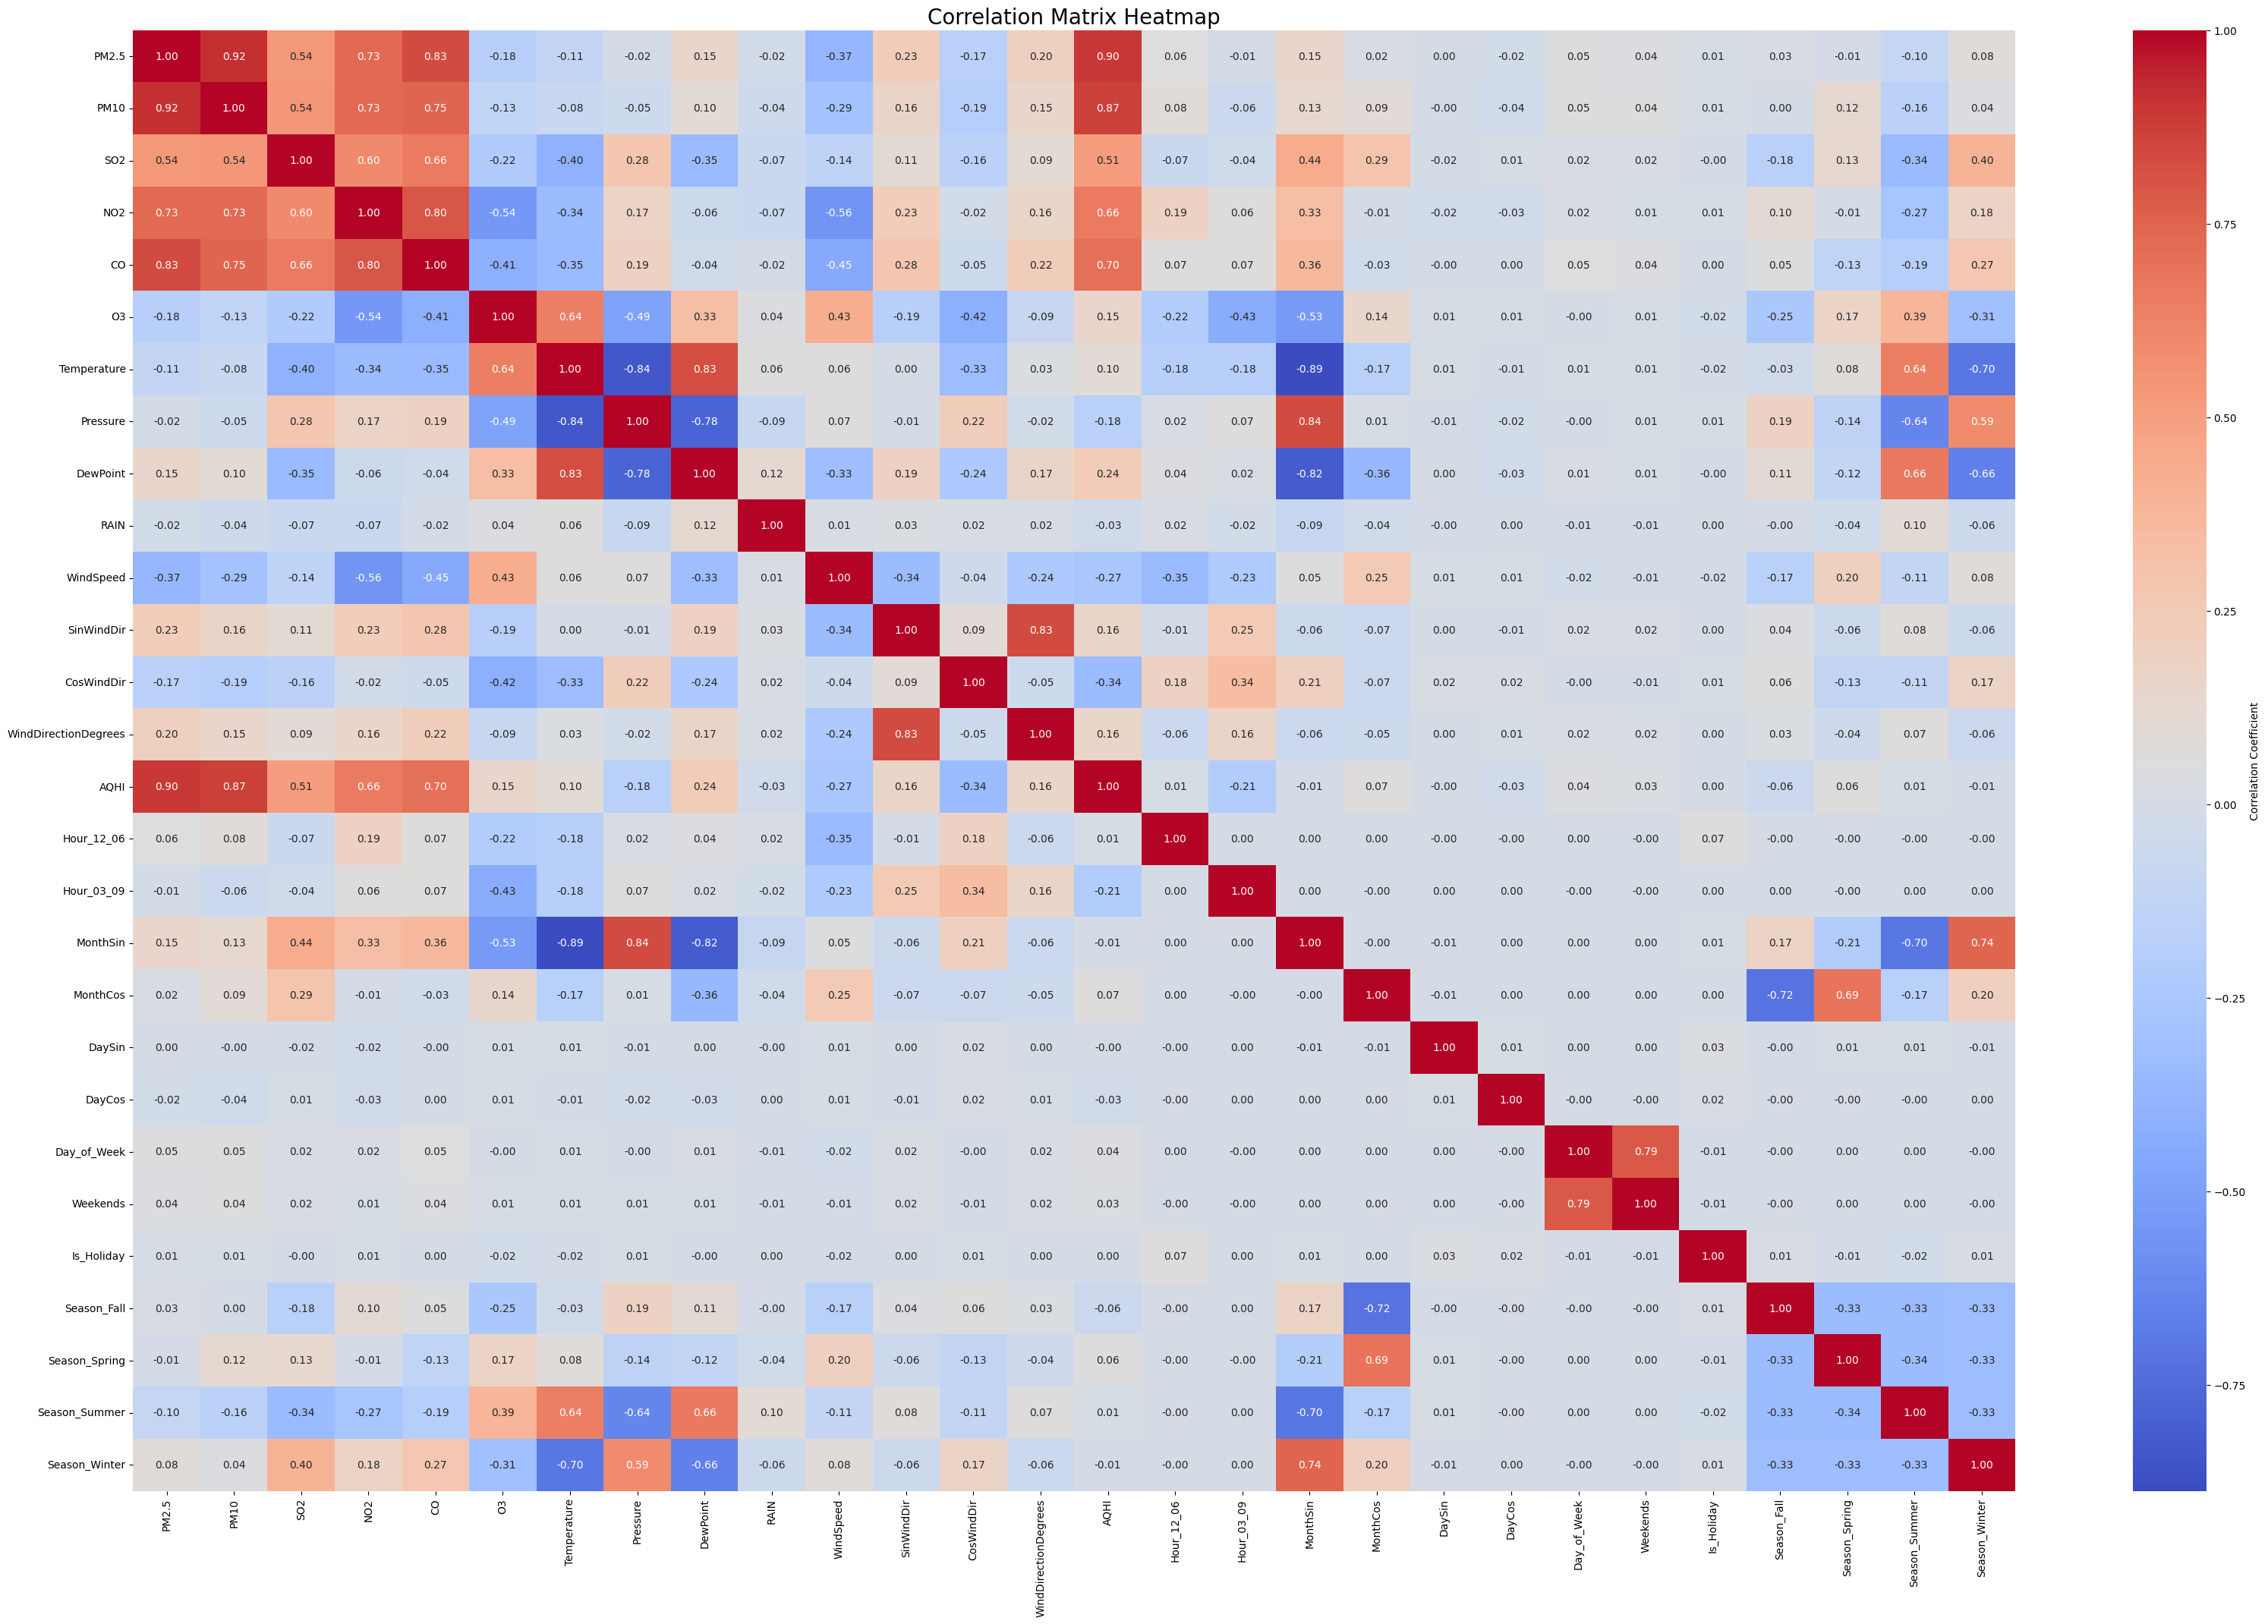

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with specified dimensions
plt.figure(figsize=(40, 25))

# Generate a heatmap to visualize the correlation matrix of the dataset
correlation_heatmap = sns.heatmap(
    clean_beijing_df_drop_encoded.corr(),  # Compute the correlation matrix of the dataset
    annot=True,  # Display correlation values on the heatmap
    fmt=".2f",   # Format the correlation values to two decimal places
    cmap="coolwarm",  # Use a diverging color palette for better visualization
    cbar_kws={'label': 'Correlation Coefficient'}  # Add a label to the color bar
)

# Add a title to the heatmap
plt.title("Correlation Matrix Heatmap", fontsize=20)

# Display the heatmap
plt.show()


**Removing Less Relevant Features from the Dataset**

In [ ]:
# Create a new DataFrame by dropping specific columns that are less relevant
beijing_correlated_df = clean_beijing_df_drop_encoded.drop(
    columns=['DaySin', 'DayCos', 'Day_of_Week', 'Weekends', 'Is_Holiday']
)

# Display the updated DataFrame's structure
beijing_correlated_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PM2.5                 35064 non-null  float64
 1   PM10                  35064 non-null  float64
 2   SO2                   35064 non-null  float64
 3   NO2                   35064 non-null  float64
 4   CO                    35064 non-null  float64
 5   O3                    35064 non-null  float64
 6   Temperature           35064 non-null  float64
 7   Pressure              35064 non-null  float64
 8   DewPoint              35064 non-null  float64
 9   RAIN                  35064 non-null  float64
 10  WindSpeed             35064 non-null  float64
 11  SinWindDir            35064 non-null  float64
 12  CosWindDir            35064 non-null  float64
 13  WindDirectionDegrees  35064 non-null  float64
 14  AQHI                  35064 non-nul

**Visualizing the Correlation Matrix of the Refined Dataset**

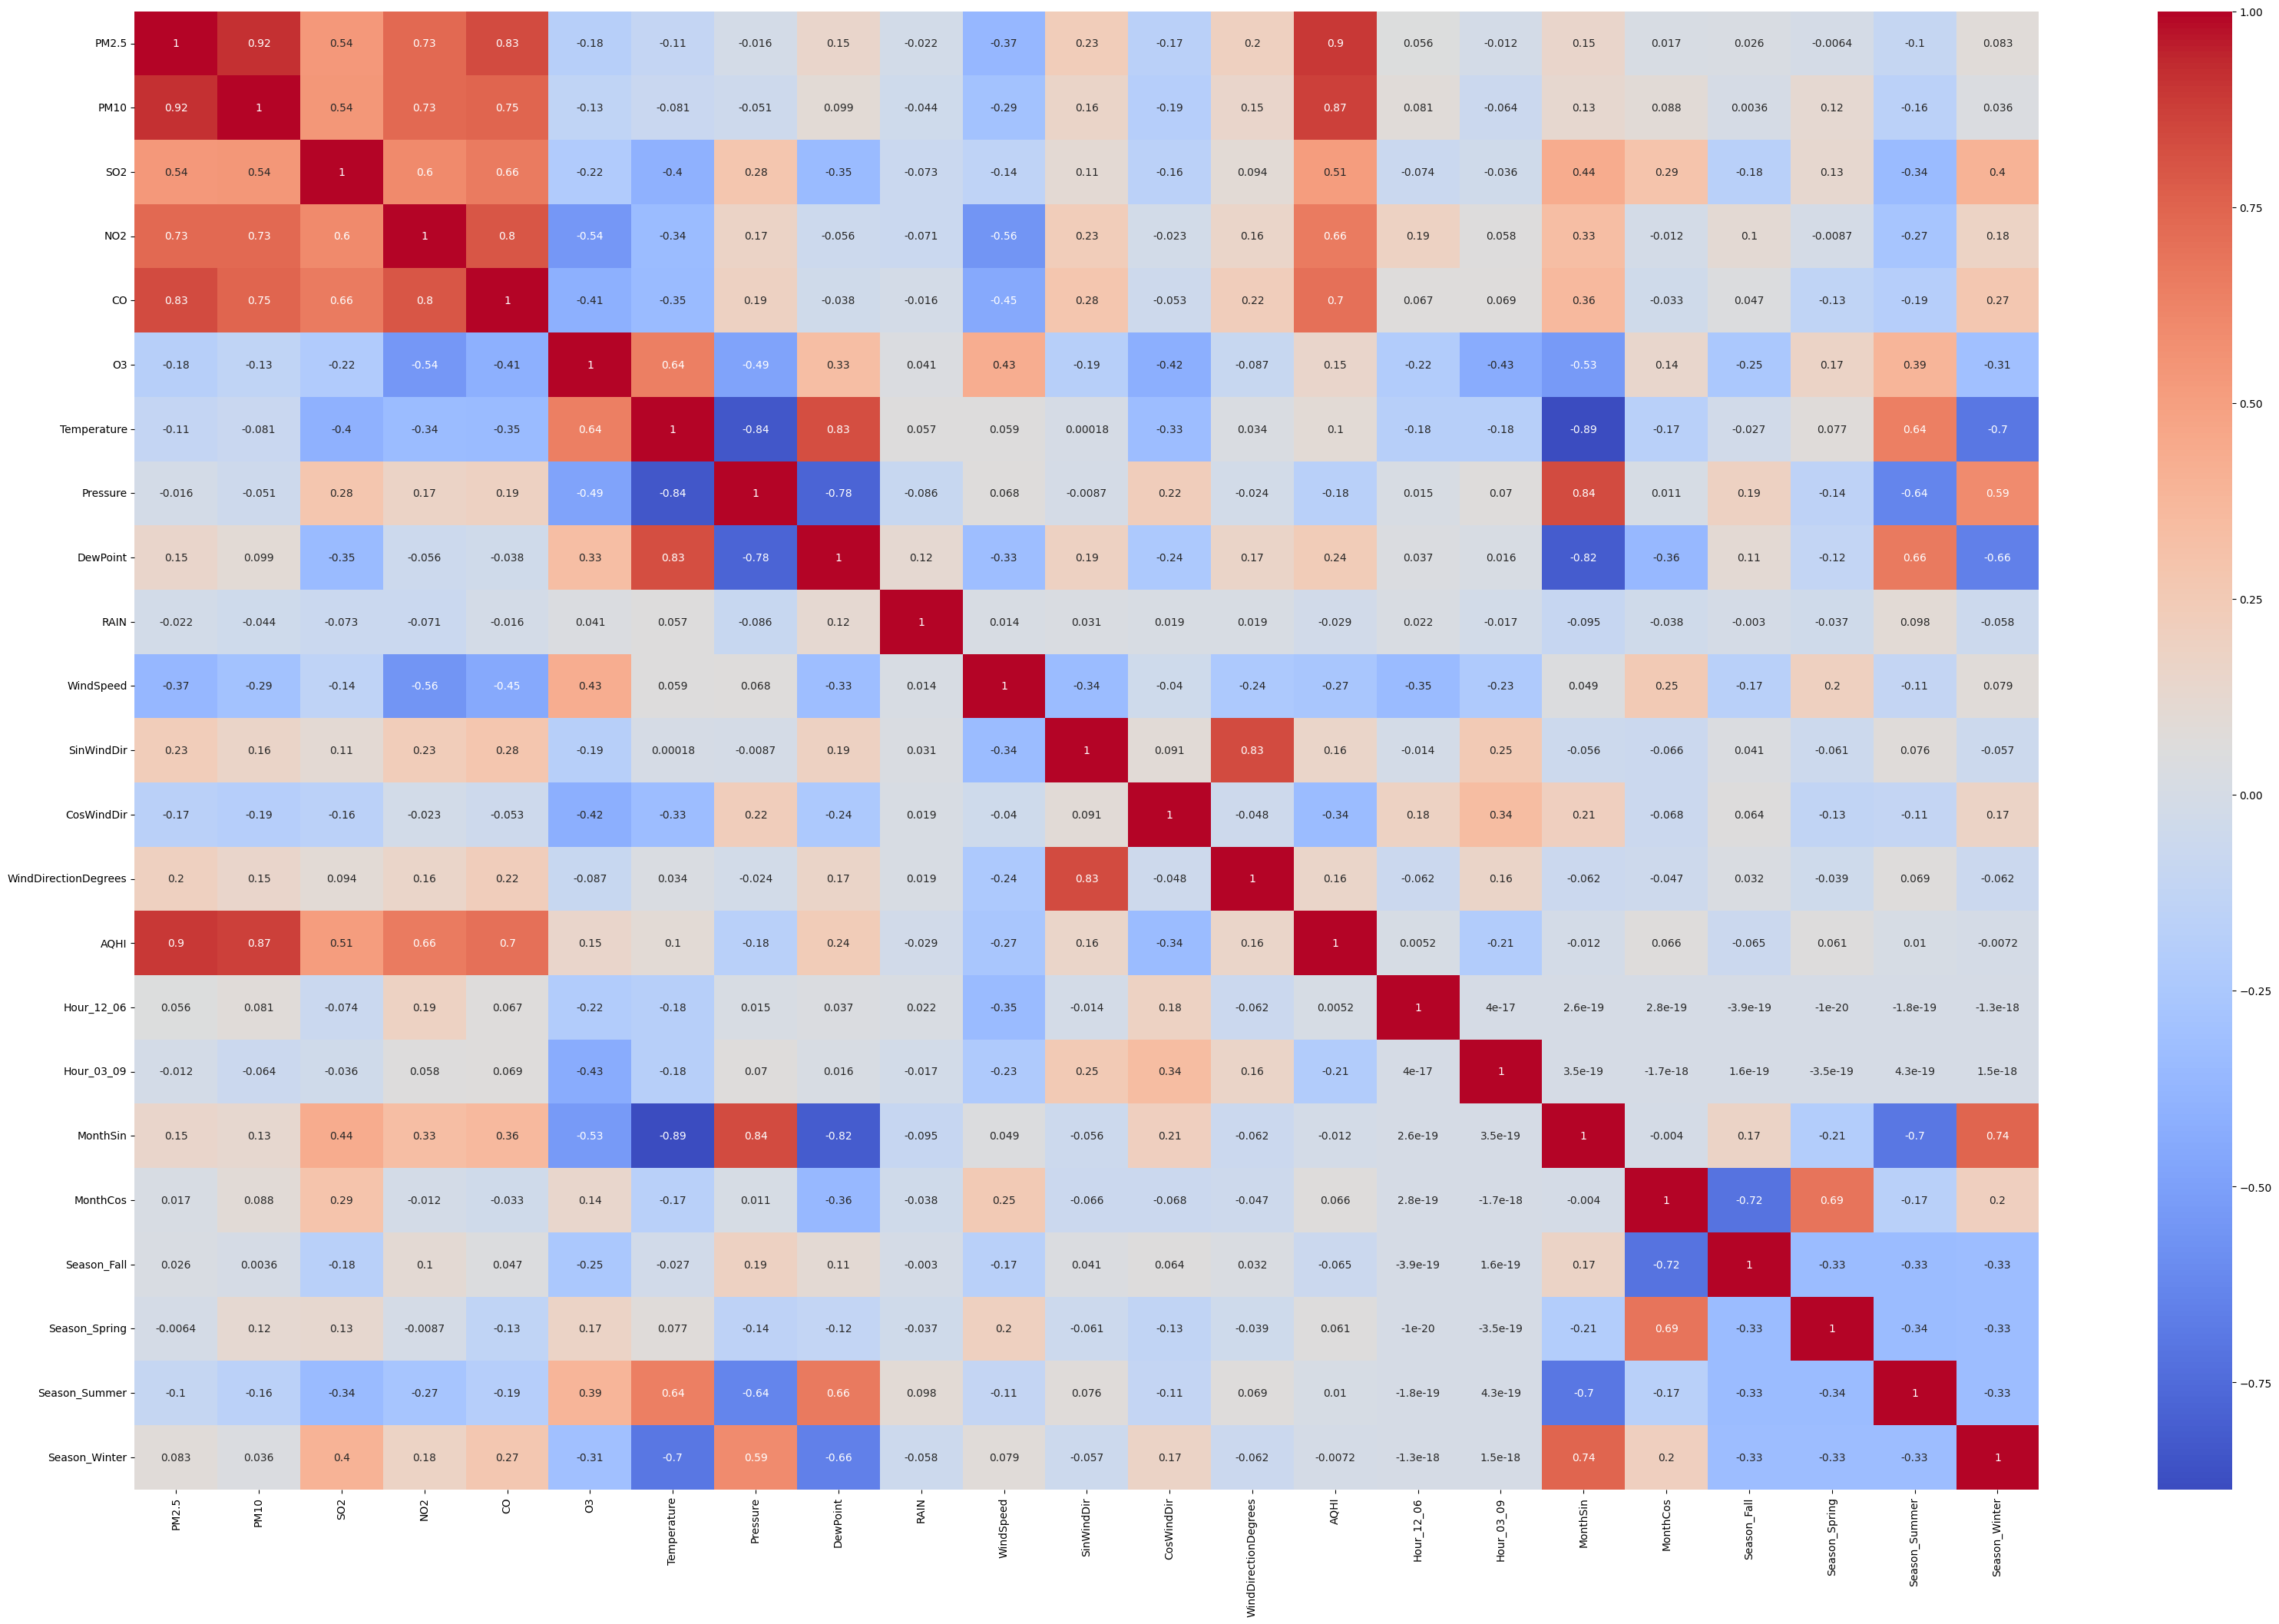

In [ ]:
# Importing necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size for the heatmap
plt.figure(figsize=(40, 25))

# Creating a heatmap to visualize the correlation matrix of the refined dataset
p = sns.heatmap(beijing_correlated_df.corr(), annot=True, cmap='coolwarm')

# Display the plot
plt.show()



**Creating Lag, Past, and Target Features for Time Series Analysis**

In [ ]:
# Function to create lag features
def create_lag_features(df, features, lag_hours=24):
    """
    Generates lag features for the given columns in the DataFrame.

    :param df: DataFrame
    :param features: List of column names to create lag features
    :param lag_hours: Number of lag hours for feature creation
    :return: DataFrame with added lag features
    """
    for feature in features:
        for i in range(1, lag_hours + 1):
            df[f'{feature}_Lag_{i}'] = df[feature].shift(i)
    return df


# Function to create past features (day-based lags)
def create_past_features(df, features, days=[1, 2, 3, 7]):
    """
    Generates past-day lag features for the given columns.

    :param df: DataFrame
    :param features: List of column names to create past features
    :param days: List of days for which past features are generated
    :return: DataFrame with added past features
    """
    for feature in features:
        for day in days:
            df[f'{feature}_{day}day_ago'] = df[feature].shift(24 * day)
    return df


# Function to define target variables for forecasting
def target_definition(df, features, forecast_hours=[1, 2, 3]):
    """
    Creates target variables by shifting features forward by specified hours for forecasting.

    :param df: DataFrame
    :param features: List of column names to define targets
    :param forecast_hours: List of hours to shift for forecasting
    :return: DataFrame with added target variables
    """
    for feature in features:
        for fh in forecast_hours:
            df[f'Target_{feature}_{fh}h'] = df[feature].shift(-fh)
    return df


# Copy the original DataFrame for time series feature engineering
time_series_df = beijing_correlated_df.copy()

#create rolling features for selected features
def create_rolling_features(df, features, window_sizes = [6, 12, 24]):

    for feature in features:
        for window_size in window_sizes:
            # Changed 'Temp' to 'Temperature'
            if feature == 'Temp':
                feature = 'Temperature'
            df[f'{feature}_Mean_{window_size}h'] = df[feature].rolling(window=window_size).mean()
            df[f'{feature}_Std_{window_size}h'] = df[feature].rolling(window=window_size).std()

    return df
# Display the column names to verify feature creation
time_series_df = create_rolling_features(time_series_df, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temperature', 'Pressure', 'DewPoint', 'RAIN', 'AQHI'], [6, 12, 24])
time_series_df.columns


Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temperature', 'Pressure',
       'DewPoint', 'RAIN', 'WindSpeed', 'SinWindDir', 'CosWindDir',
       'WindDirectionDegrees', 'AQHI', 'Hour_12_06', 'Hour_03_09', 'MonthSin',
       'MonthCos', 'Season_Fall', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'PM2.5_Mean_6h', 'PM2.5_Std_6h', 'PM2.5_Mean_12h',
       'PM2.5_Std_12h', 'PM2.5_Mean_24h', 'PM2.5_Std_24h', 'PM10_Mean_6h',
       'PM10_Std_6h', 'PM10_Mean_12h', 'PM10_Std_12h', 'PM10_Mean_24h',
       'PM10_Std_24h', 'SO2_Mean_6h', 'SO2_Std_6h', 'SO2_Mean_12h',
       'SO2_Std_12h', 'SO2_Mean_24h', 'SO2_Std_24h', 'NO2_Mean_6h',
       'NO2_Std_6h', 'NO2_Mean_12h', 'NO2_Std_12h', 'NO2_Mean_24h',
       'NO2_Std_24h', 'CO_Mean_6h', 'CO_Std_6h', 'CO_Mean_12h', 'CO_Std_12h',
       'CO_Mean_24h', 'CO_Std_24h', 'O3_Mean_6h', 'O3_Std_6h', 'O3_Mean_12h',
       'O3_Std_12h', 'O3_Mean_24h', 'O3_Std_24h', 'Temperature_Mean_6h',
       'Temperature_Std_6h', 'Temperature_Mean_12h', 

**Adding Target, Lag, and Past Features to Time Series Data**

In [ ]:
# Create target variables for prediction
time_series_df = target_definition(
    time_series_df,
    features=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQHI'],
    forecast_hours=[1, 2, 3, 8, 24]
)
print(time_series_df.columns)  # Display column names to verify target creation

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'Temperature', 'Pressure',
       'DewPoint', 'RAIN',
       ...
       'Target_O3_1h', 'Target_O3_2h', 'Target_O3_3h', 'Target_O3_8h',
       'Target_O3_24h', 'Target_AQHI_1h', 'Target_AQHI_2h', 'Target_AQHI_3h',
       'Target_AQHI_8h', 'Target_AQHI_24h'],
      dtype='object', length=124)


<ipython-input-36-9967181d3dfa>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Target_{feature}_{fh}h'] = df[feature].shift(-fh)
<ipython-input-36-9967181d3dfa>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Target_{feature}_{fh}h'] = df[feature].shift(-fh)
<ipython-input-36-9967181d3dfa>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get 

In [ ]:
# Generate lag features for the specified variables
time_series_df = create_lag_features(
    time_series_df,
    features=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQHI'],
    lag_hours=24
)
print(time_series_df.shape)  # Print DataFrame shape to confirm changes

<ipython-input-36-9967181d3dfa>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_Lag_{i}'] = df[feature].shift(i)
<ipython-input-36-9967181d3dfa>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_Lag_{i}'] = df[feature].shift(i)
<ipython-input-36-9967181d3dfa>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmente

(35064, 292)


<ipython-input-36-9967181d3dfa>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_Lag_{i}'] = df[feature].shift(i)
<ipython-input-36-9967181d3dfa>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_Lag_{i}'] = df[feature].shift(i)
<ipython-input-36-9967181d3dfa>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmente

In [ ]:
# Create past-day features for the specified variables
time_series_df = create_past_features(
    time_series_df,
    features=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQHI'],
    days=[1, 2, 3, 7]
)
print(time_series_df.shape)  # Print DataFrame shape after adding past features


(35064, 320)


<ipython-input-36-9967181d3dfa>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_{day}day_ago'] = df[feature].shift(24 * day)
<ipython-input-36-9967181d3dfa>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{feature}_{day}day_ago'] = df[feature].shift(24 * day)
<ipython-input-36-9967181d3dfa>:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instea

In [ ]:
# Copy the DataFrame and drop rows with missing values
time_series_df_added = time_series_df.copy()
time_series_df_added.dropna(inplace=True)  # Remove rows with NaN values
print(time_series_df_added.shape)  # Display shape of cleaned DataFrame

(34872, 320)


**Splitting Features and Targets for Model Training**

In [ ]:
# Drop original pollutant and AQHI columns from the feature DataFrame
time_series_df_added = time_series_df_added.drop(
    columns=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQHI']
)
print(time_series_df_added.shape)  # Verify shape after dropping columns

# Define function to generate target labels
def target_label_definition(features, forecast_hours=[1, 2, 3, 8, 24]):
    """
    Generate a list of target column names based on features and forecast horizons.

    :param list features: List of feature names for which targets are defined.
    :param list forecast_hours: Time horizons for forecasting.

    :return: List of target column names.
    :rtype: list
    """
    labels = [f'Target_{feature}_{fh}h' for feature in features for fh in forecast_hours]
    return labels

# Generate target labels
target_labels = target_label_definition(
    features=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQHI']
)
print(target_labels)  # Output the generated target labels

# Create a separate DataFrame for target columns
df_target = time_series_df_added[target_labels].copy()

# Create a separate DataFrame for feature columns by dropping target columns
df_features = time_series_df_added.drop(columns=target_labels)

# Print shapes of the feature and target DataFrames
print('df_features >> ', df_features.shape)  # Features DataFrame shape
print('df_target >> ', df_target.shape)      # Target DataFrame shape


(34872, 313)
['Target_PM2.5_1h', 'Target_PM2.5_2h', 'Target_PM2.5_3h', 'Target_PM2.5_8h', 'Target_PM2.5_24h', 'Target_PM10_1h', 'Target_PM10_2h', 'Target_PM10_3h', 'Target_PM10_8h', 'Target_PM10_24h', 'Target_SO2_1h', 'Target_SO2_2h', 'Target_SO2_3h', 'Target_SO2_8h', 'Target_SO2_24h', 'Target_NO2_1h', 'Target_NO2_2h', 'Target_NO2_3h', 'Target_NO2_8h', 'Target_NO2_24h', 'Target_CO_1h', 'Target_CO_2h', 'Target_CO_3h', 'Target_CO_8h', 'Target_CO_24h', 'Target_O3_1h', 'Target_O3_2h', 'Target_O3_3h', 'Target_O3_8h', 'Target_O3_24h', 'Target_AQHI_1h', 'Target_AQHI_2h', 'Target_AQHI_3h', 'Target_AQHI_8h', 'Target_AQHI_24h']
df_features >>  (34872, 278)
df_target >>  (34872, 35)


**Splitting Dataset into Training and Testing Sets**

In [ ]:
# Define function for splitting data into training and testing sets
def train_test_split_data(
    df_features,
    df_target,
    train_start_date='2013-01-01',
    train_end_date='2016-12-31',
    test_start_date='2017-01-01',
    test_end_date='2017-12-31'
):
    """
    Splits the dataset into training and testing sets based on the specified date ranges.

    :param dataframe df_features: Feature DataFrame
    :param dataframe df_target: Target DataFrame
    :param str train_start_date: Start date for the training set (default: '2013-01-01')
    :param str train_end_date: End date for the training set (default: '2016-12-31')
    :param str test_start_date: Start date for the testing set (default: '2017-01-01')
    :param str test_end_date: End date for the testing set (default: '2017-12-31')

    :return: Split data: X_train, Y_train, X_test, Y_test
    :rtype: tuple of DataFrames
    """
    # Split features and target data for training and testing sets
    X_train = df_features.loc[train_start_date:train_end_date]
    Y_train = df_target.loc[train_start_date:train_end_date]
    X_test = df_features.loc[test_start_date:test_end_date]
    Y_test = df_target.loc[test_start_date:test_end_date]

    return X_train, Y_train, X_test, Y_test

# Perform the train-test split using default date ranges
X_train, Y_train, X_test, Y_test = train_test_split_data(df_features, df_target)

# Display the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Training target shape:", Y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", Y_test.shape)
df_features.to_csv('df_features.csv', index=False)
df_target.to_csv('df_target.csv', index=False)

Training features shape: (33480, 278)
Training target shape: (33480, 35)
Test features shape: (1392, 278)
Test target shape: (1392, 35)


**Exporting Train-Test Data to CSV Files**

In [ ]:
# Export training and testing features and targets to CSV files
X_train.to_csv('Beijing_simple_model_xtrain.csv', index=False)
Y_train.to_csv('Beijing_simple_model_ytrain.csv', index=False)
X_test.to_csv('Beijing_simple_model_xtest.csv', index=False)
Y_test.to_csv('Beijing_simple_model_ytest.csv', index=False)

# Confirm successful export
print("Training and testing datasets have been successfully saved to CSV files.")


Training and testing datasets have been successfully saved to CSV files.


**Simple Regression Models: Model Evaluation and Plotting**

In [ ]:
# Import necessary libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate the model
def model_evaluation(y_test: np.ndarray, y_pred: np.ndarray):
    """
    Model Evaluation
    Computes the Mean Absolute Error (MAE) and Mean Squared Error (MSE) for model performance.

    :param np.ndarray y_test: The array with the actual values to be predicted.
    :param np.ndarray y_pred: The array with the forecasted values; must align with actual values.
    :return: MAE, MSE
    :rtype: tuple of floats
    """

    # Compute Mean Absolute Error (MAE)
    mae_error = mean_absolute_error(y_test, y_pred)

    # Compute Mean Squared Error (MSE)
    mse_error = mean_squared_error(y_test, y_pred)

    return mae_error, mse_error

# Function to plot the actual vs predicted values
def plot_response(y_pred, y_test):
    """
    Plot the comparison between actual values (y_test) and predicted values (y_pred).

    :param y_pred: The predicted values.
    :param y_test: The actual values.
    """

    x_values = np.arange(len(y_test))

    plt.figure(figsize=(12, 6))

    # Plotting y_test (actual values)
    plt.plot(x_values, y_test, label='Actual (y_test)', color='b')

    # Plotting y_pred (predicted values)
    plt.plot(x_values, y_pred, label='Predicted (y_pred)', linestyle='--', color='r')

    # Adding labels and legend
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()

    # Displaying the plot
    plt.show()


**Linear Regression Model: Training, Evaluation, and Plotting**

Mean Absolute Error (MAE): 0.32970484763887237
Mean Squared Error (MSE): 0.2958059729310339
Root Mean Squared Error (RMSE): 0.5438804766959685


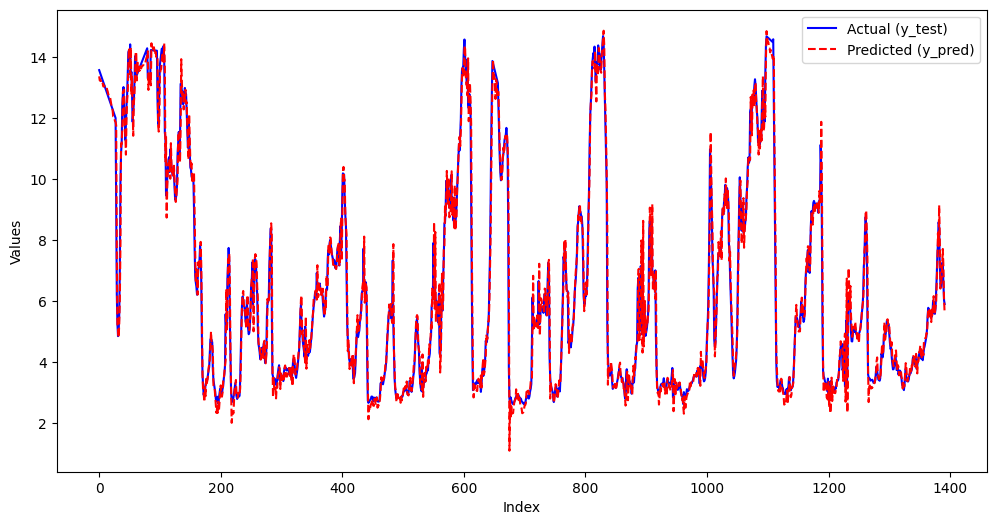

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import math

# Function for simple linear regression model
def linear_regression_model(X_train, y_train, X_test, y_test):

    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the linear regression model
    linear_regression_model = LinearRegression()

    # Train the model on the training data
    linear_regression_model.fit(X_train_scaled, y_train)

    # Generate predictions on the test dataset
    pred = linear_regression_model.predict(X_test_scaled)

    # Evaluate the model
    mae, mse = model_evaluation(y_test.values, pred)

    return linear_regression_model, pred, mae, mse

# Train the linear regression model
linear_model, linear_model_pred, linear_model_mae, linear_model_mse = linear_regression_model(
    X_train,
    Y_train['Target_AQHI_1h'],
    X_test,
    Y_test['Target_AQHI_1h']
)

# Print the computed metrics
print("Mean Absolute Error (MAE):", linear_model_mae)
print("Mean Squared Error (MSE):", linear_model_mse)
print("Root Mean Squared Error (RMSE):", math.sqrt(linear_model_mse))

# Plotting the actual vs predicted values
plot_response(np.array(linear_model_pred), np.array(Y_test['Target_AQHI_1h']))


**Lasso Regression with Grid Search and Blocked Cross-Validation**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

# Function for Lasso regression with grid search
def lasso_regression_model(X_train, y_train, X_test, y_test):

    # Lasso regression with grid search to get the perfect alpha

    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Create a Lasso regression model
    lasso_model = Lasso()

    # Define a grid of hyperparameters to search over
    param_grid = {'alpha': [1, 10, 50, 100, 500, 1000]}

    # Perform grid search with cross-validation

    # Perform time-aware cross-validation with grid search
    tscv = TimeSeriesSplit(n_splits=5)
    grid_search = GridSearchCV(lasso_model, param_grid, cv=tscv)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best hyperparameters
    best_alpha = grid_search.best_params_['alpha']

    # Create a new Lasso model with the best alpha
    best_lasso_model = Lasso(alpha=best_alpha)

    # Fit the model to the training data
    best_lasso_model.fit(X_train_scaled, y_train)

    # Evaluate the model
    train_score = best_lasso_model.score(X_train_scaled, y_train)
    test_score = best_lasso_model.score(X_test_scaled, y_test)

    lasso_coefficients = best_lasso_model.coef_

    # Generate predictions on the test dataset
    pred = best_lasso_model.predict(X_test_scaled)

    # Evaluate the model
    mae, mse = model_evaluation(y_test.values, pred)

    return lasso_coefficients, train_score, test_score, pred, mae, mse

# Train the Lasso regression model
lasso_coefficients, lasso_train_score, lasso_test_score, lasso_pred, lasso_mae, lasso_mse = lasso_regression_model(
    X_train,
    Y_train['Target_AQHI_1h'],
    X_test,
    Y_test['Target_AQHI_1h']
)

# Print the computed metrics
print("Train Score:", lasso_train_score)
print("Test Score:", lasso_test_score)
print("Mean Absolute Error (MAE):", lasso_mae)
print("Mean Squared Error (MSE):", lasso_mse)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Train Score: 0.7950034033935565
Test Score: 0.8088535255606788
Mean Absolute Error (MAE): 1.2813868397796404
Mean Squared Error (MSE): 2.4212875406388195


The Linear Regression model performs better than the Lasso Regression model, with significantly lower MAE and MSE values.

**Apply Backward Elimination to Select Relevant Features**


In [ ]:
!pip3 install statsmodels

In [ ]:

# Merge the training and test datasets vertically
X_combined_df = pd.concat([X_train, X_test], axis=0)
Y_combined_df = pd.concat([Y_train, Y_test], axis=0)

# Display the shape of the combined datasets
print("Combined X shape:", X_combined_df.shape)
print("Combined Y shape:", Y_combined_df.shape)


Combined X shape: (34872, 278)
Combined Y shape: (34872, 35)


**Feature Selection using Backward Elimination and Model Evaluation with Linear Regression**

In [ ]:
# Importing necessary libraries
import statsmodels.api as sm
import numpy as np
import math

# Function for backward elimination using p-values
def backward_elimination(X, y, significance_level=0.05):
    num_features = X.shape[1]

    print('num_features >> ', num_features, type(y), type(X))
    # Keep only numeric columns
    X = X.select_dtypes(include=['number'])  # Retain numeric columns only
    # X = sm.add_constant(X)  # Optionally, add a constant term for the model

    # Loop through features to eliminate those with p-values higher than the significance level
    for i in range(num_features):
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues  # Get p-values for each feature
        print(i, " >> ")
        max_p_value = p_values.max()  # Find the highest p-value
        print('max_p_value >> ', max_p_value)

        if max_p_value > significance_level:
            # Remove feature with the highest p-value
            max_p_value_index = p_values.argmax()
            X = X.drop(columns=X.columns[max_p_value_index])
        else:
            # Stop if all p-values are below significance level
            break

    return X  # Return the reduced feature set


# Convert data to NumPy arrays (if needed)
X_array = np.asarray(X_combined_df)
y_array = np.asarray(Y_combined_df['Target_AQHI_1h'])

# Perform backward elimination on the data
X_selected = backward_elimination(X_combined_df.copy(), Y_combined_df['Target_AQHI_1h'].copy())

# Print the selected features
print("Selected Features after Backward Elimination:")
print(X_selected.columns)

# Convert selected columns to a list for use in the linear model
X_selected_columns = list(X_selected.columns)
type(X_selected_columns)

# Train a linear regression model using the selected features
linear_model_reduced, linear_model_reduced_pred, linear_model_reduced_mae, linear_model_reduced_mse = linear_regression_model(
    X_train.loc[:, X_selected_columns],
    Y_train['Target_AQHI_1h'],
    X_test.loc[:, X_selected_columns],
    Y_test['Target_AQHI_1h']
)

# Print the computed performance metrics
print("Mean Absolute Error (MAE):", linear_model_reduced_mae)
print("Mean Squared Error (MSE):", linear_model_reduced_mse)
print("Root Mean Squared Error (RMSE):", math.sqrt(linear_model_reduced_mse))


num_features >>  278 <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>
0  >> 
max_p_value >>  0.999660885550284
1  >> 
max_p_value >>  0.9996608855225617
2  >> 
max_p_value >>  0.9920601205770297
3  >> 
max_p_value >>  0.9630890432289254
4  >> 
max_p_value >>  0.9549993372788135
5  >> 
max_p_value >>  0.9378098652570983
6  >> 
max_p_value >>  0.9306866333897479
7  >> 
max_p_value >>  0.9183427222167865
8  >> 
max_p_value >>  0.9171992084590619
9  >> 
max_p_value >>  0.9158895801327177
10  >> 
max_p_value >>  0.919472910578368
11  >> 
max_p_value >>  0.962124299469338
12  >> 
max_p_value >>  0.9010095961164121
13  >> 
max_p_value >>  0.8943088319603317
14  >> 
max_p_value >>  0.8888535794241215
15  >> 
max_p_value >>  0.9510099859506118
16  >> 
max_p_value >>  0.9336757293583844
17  >> 
max_p_value >>  0.8584777307940641
18  >> 
max_p_value >>  0.8398212784979707
19  >> 
max_p_value >>  0.908062922903181
20  >> 
max_p_value >>  0.8653411862656487
21  >> 
max_p_va

**Improved Outcome: Selected Features and Performance Visualization**

Shape of Reduced Training Data: (33480, 111)


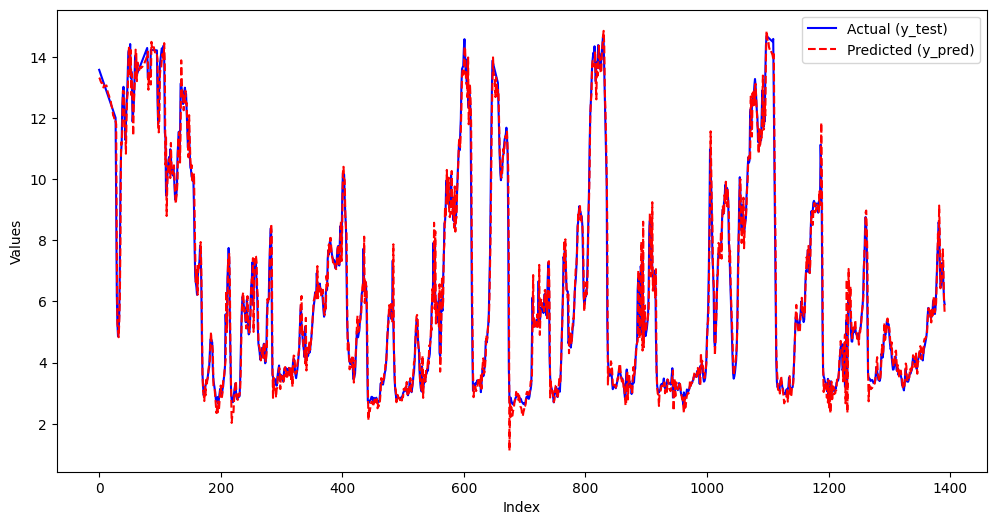

In [ ]:
# Checking the shape of the reduced training data
print("Shape of Reduced Training Data:", X_train.loc[:, X_selected_columns].shape)

# Plotting the response: comparing predictions vs actual values
plot_response(np.array(linear_model_reduced_pred), np.array(Y_test['Target_AQHI_1h']))


**Model Evaluation for PM2.5 Prediction**

Mean Absolute Error (MAE): 5.299401219661027
Mean Squared Error (MSE): 91.41765902414005


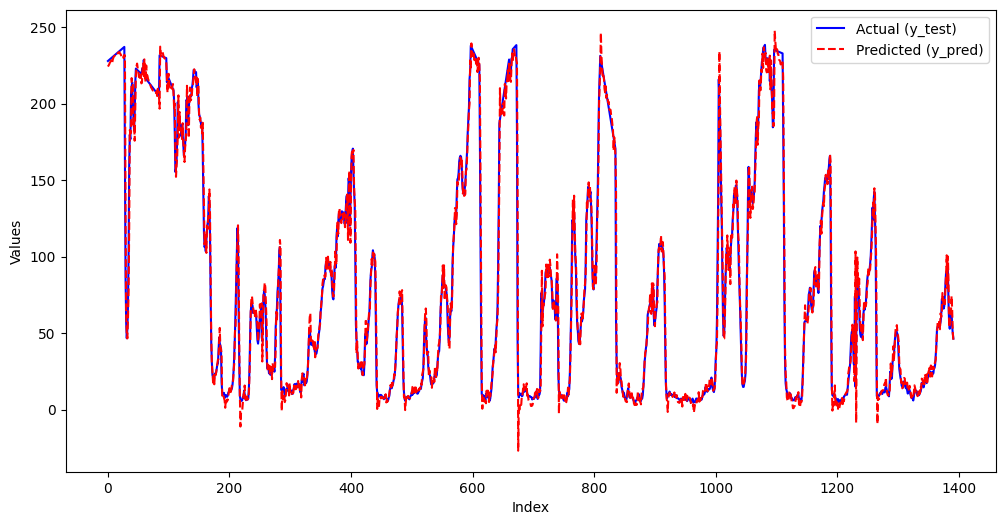

In [ ]:
# Perform linear regression for PM2.5 prediction using selected features
linear_model2_5, linear_model_pred2_5, linear_model_mae2_5, linear_model_mse2_5 = linear_regression_model(
    X_train.loc[:, X_selected_columns],
    Y_train['Target_PM2.5_1h'],
    X_test.loc[:, X_selected_columns],
    Y_test['Target_PM2.5_1h']
)

# Print the computed metrics for MAE and MSE
print("Mean Absolute Error (MAE):", linear_model_mae2_5)
print("Mean Squared Error (MSE):", linear_model_mse2_5)

# Plot the response comparing predicted vs actual PM2.5 values
plot_response(np.array(linear_model_pred2_5), np.array(Y_test['Target_PM2.5_1h']))


**Model Evaluation for AQHI Prediction (3-Hour Interval)**

Mean Absolute Error (MAE): 0.7706195440764775
Mean Squared Error (MSE): 1.3682874034337629
Root Mean Squared Error (RMSE): 1.1697381773002722


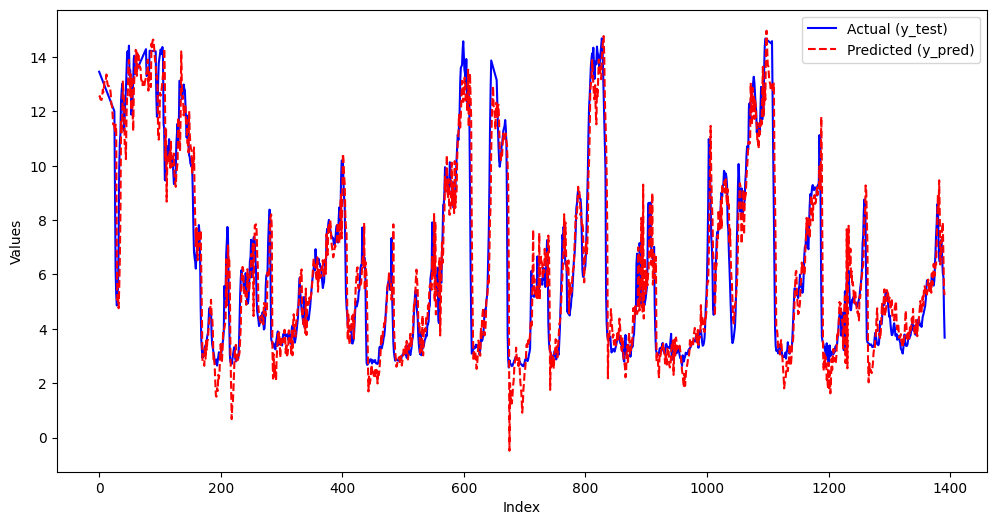

In [ ]:
# Perform linear regression for AQHI prediction at 3-hour interval using selected features
linear_model3, linear_model_pred3, linear_model_mae3, linear_model_mse3 = linear_regression_model(
    X_train.loc[:, X_selected_columns],
    Y_train['Target_AQHI_3h'],
    X_test.loc[:, X_selected_columns],
    Y_test['Target_AQHI_3h']
)

# Print the computed metrics for MAE, MSE, and RMSE
print("Mean Absolute Error (MAE):", linear_model_mae3)
print("Mean Squared Error (MSE):", linear_model_mse3)
print("Root Mean Squared Error (RMSE):", math.sqrt(linear_model_mse3))

# Plot the response comparing predicted vs actual AQHI values at 3-hour interval
plot_response(np.array(linear_model_pred3), np.array(Y_test['Target_AQHI_3h']))


**Model Evaluation for AQHI Prediction (8-Hour Interval)**

Mean Absolute Error (MAE): 1.4413659097133547
Mean Squared Error (MSE): 4.216549259828106
Root Mean Squared Error (RMSE): 2.053423789632356


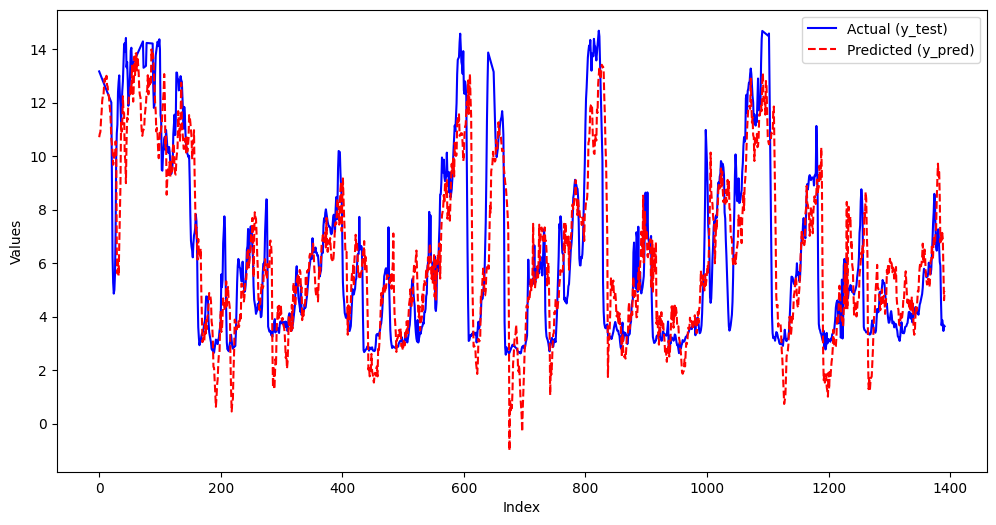

In [ ]:
# Perform linear regression for AQHI prediction at 8-hour interval using selected features
linear_model8, linear_model_pred8, linear_model_mae8, linear_model_mse8 = linear_regression_model(
    X_train.loc[:, X_selected_columns],
    Y_train['Target_AQHI_8h'],
    X_test.loc[:, X_selected_columns],
    Y_test['Target_AQHI_8h']
)

# Print the computed metrics for MAE, MSE, and RMSE
print("Mean Absolute Error (MAE):", linear_model_mae8)
print("Mean Squared Error (MSE):", linear_model_mse8)
print("Root Mean Squared Error (RMSE):", math.sqrt(linear_model_mse8))

# Plot the response comparing predicted vs actual AQHI values at 8-hour interval
plot_response(np.array(linear_model_pred8), np.array(Y_test['Target_AQHI_8h']))



**Model Evaluation for AQHI Prediction (24-Hour Interval)**

Mean Absolute Error (MAE): 2.3040869274476075
Mean Squared Error (MSE): 8.461861073628206
Root Mean Squared Error (RMSE): 2.9089278220038746


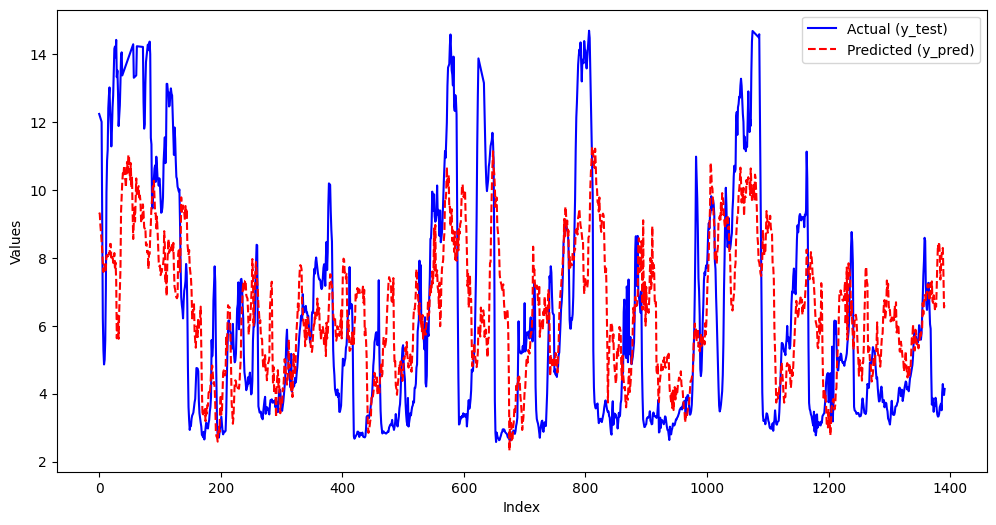

In [ ]:
# Perform linear regression for AQHI prediction at 24-hour interval using selected features
linear_model24, linear_model_pred24, linear_model_mae24, linear_model_mse24 = linear_regression_model(
    X_train.loc[:, X_selected_columns],
    Y_train['Target_AQHI_24h'],
    X_test.loc[:, X_selected_columns],
    Y_test['Target_AQHI_24h']
)

# Print the computed metrics for MAE, MSE, and RMSE
print("Mean Absolute Error (MAE):", linear_model_mae24)
print("Mean Squared Error (MSE):", linear_model_mse24)
print("Root Mean Squared Error (RMSE):", math.sqrt(linear_model_mse24))

# Plot the response comparing predicted vs actual AQHI values at 24-hour interval
plot_response(np.array(linear_model_pred24), np.array(Y_test['Target_AQHI_24h']))


**Plot of RMSE (AQHI - Prediction) vs. Hours**

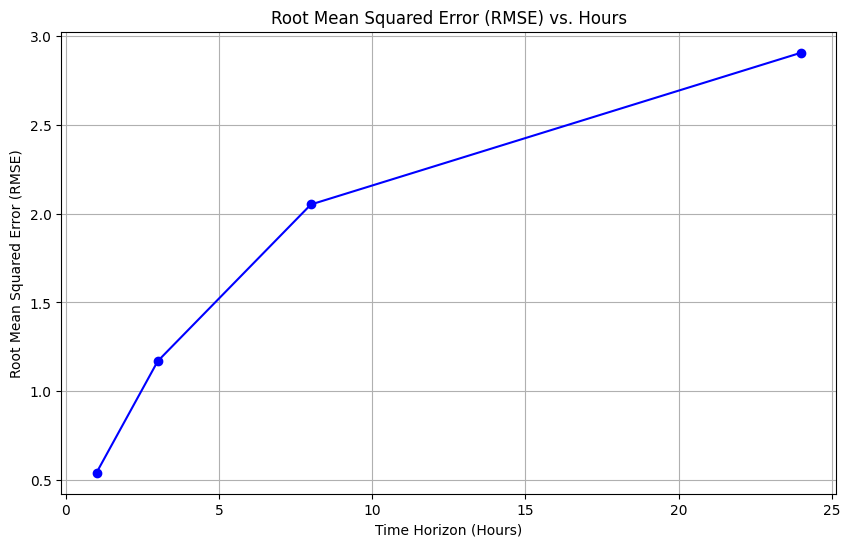

In [ ]:
# Data for RMSE values at different hours
hours = [1, 3, 8, 24]
rmse = [0.5407, 1.1696, 2.052, 2.907]

# Plotting the RMSE vs Hours graph
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(hours, rmse, marker='o', linestyle='-', color='b')  # Plot with blue color and circular markers
plt.title('Root Mean Squared Error (RMSE) vs. Hours')  # Title of the plot
plt.xlabel('Time Horizon (Hours)')  # Label for X-axis
plt.ylabel('Root Mean Squared Error (RMSE)')  # Label for Y-axis
plt.grid(True)  # Show grid for better readability
plt.show()  # Display the plot


**PCA: Plotting the Cumulative Explained Variance**

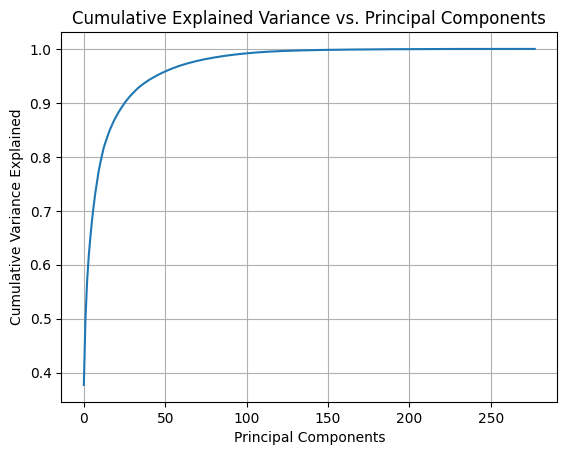

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Create a copy of the training dataset
X_train_pca = X_train.copy()

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)

# Initialize PCA object
pca = PCA()

# Fit PCA to the standardized training data
pca.fit(X_train_scaled)

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance vs. Principal Components')
plt.grid(True)
plt.show()


**Scaling and PCA Transformation for Linear Regression Model Evaluation**

In [ ]:
# Scaling and applying PCA with 100 components
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Creating PCA object with 100 components
pca = PCA(n_components=100)

# Applying PCA to the scaled training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Converting the transformed data to a DataFrame for further analysis or processing
X_train_pca_df = pd.DataFrame(data=X_train_pca)

# Standardizing the test data using the same scaler as for training
X_test_scaled = scaler.transform(X_test)

# Transforming the test data using the fitted PCA
X_test_pca = pca.transform(X_test_scaled)

# Converting the transformed test data to DataFrame
X_test_pca_df = pd.DataFrame(data=X_test_pca)

# Applying linear regression model on PCA-transformed data
pca_model, pca_pred, pca_mae, pca_mse = linear_regression_model(
    X_train_pca_df,
    Y_train['Target_AQHI_1h'],
    X_test_pca_df,
    Y_test['Target_AQHI_1h']
)

# Printing the performance metrics
print("Mean Absolute Error (MAE):", pca_mae)
print("Mean Squared Error (MSE):", pca_mse)
print("Root Mean Squared Error (RMSE):", math.sqrt(pca_mse))


Mean Absolute Error (MAE): 0.6372162458810303
Mean Squared Error (MSE): 0.8916818933558613
Root Mean Squared Error (RMSE): 0.9442890941633613


Linear Regression provides the best performance with the lowest MAE and MSE, outperforming both Lasso Regression and PCA reduction.

# **Lets Try more complex models**

Hyperparameter Tuning for Random Forest Regressor with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

def grid_search_random_forest(X_train, y_train):


    mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

    rf_regressor = RandomForestRegressor(random_state=42)

    rf_grid_param = {
        'n_estimators': [100, 200],
        'max_depth': [10, 15, 20],
    }

    tscv = TimeSeriesSplit(n_splits=5)

    # Grid search for Random Forest
    rf_grid_search = GridSearchCV(estimator=rf_regressor,
                                    param_grid=rf_grid_param,
                                    scoring=mape_scorer,
                                    cv=tscv,
                                    error_score='raise',
                                    n_jobs=-1)

    rf_grid_search.fit(X_train, y_train)

    # Get best parameters
    best_rf_params = rf_grid_search.best_params_


    return best_rf_params

In [ ]:
# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

best_rf_params = grid_search_random_forest(X_train_scaled, Y_train['Target_AQHI_1h'])



print("best_rf_params >> ", best_rf_params)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy

best_rf_params >>  {'max_depth': 20, 'n_estimators': 200}


**Random Forest Model Training and Evaluation**

In [ ]:
def random_forest_model(X_train, y_train, X_test, y_test, max_depth = 20, n_estimators = 200):

    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the random forest model
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Generate predictions on the test dataset
    pred = model.predict(X_test_scaled)

    print('pred.shape >> ', pred.shape)
    print('y_test.values >> ', y_test.values.shape)

    #Evaluate the model
    mae, mse = model_evaluation(y_test.values, pred)

    return model, pred, mae, mse

In [ ]:
rf_model, pred, mae, mse = random_forest_model(
    X_train,
    Y_train['Target_AQHI_1h'],
    X_test,
    Y_test['Target_AQHI_1h']
  )

# Print the computed metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

pred.shape >>  (1413,)
y_test.values >>  (1413,)
Mean Absolute Error (MAE): 0.5009871499358178
Mean Squared Error (MSE): 0.6784320215872494


**Linear Regression Performs Better**


**XGBoost Model Training and Evaluation**

In [ ]:
import xgboost as xgb

def xgboost_model(X_train, y_train, X_test, y_test, max_depth=5, n_estimators=500):
    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the XGBoost model
    model = xgb.XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=42)

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Generate predictions on the test dataset
    pred = model.predict(X_test_scaled)

    print('pred.shape >> ', pred.shape)
    print('y_test.values >> ', y_test.values.shape)

    # Evaluate the model
    mae, mse = model_evaluation(y_test.values, pred)

    return model, pred, mae, mse


In [ ]:
xgboost, xgboost_pred, xgboost_mae, xgboost_mse = xgboost_model(
    X_train,
    Y_train['Target_AQHI_1h'],
    X_test,
    Y_test['Target_AQHI_1h']
  )

# Print the computed metrics
print("Mean Absolute Error (MAE):", xgboost_mae)
print("Mean Squared Error (MSE):", xgboost_mse)

pred.shape >>  (1413,)
y_test.values >>  (1413,)
Mean Absolute Error (MAE): 0.4874225649852332
Mean Squared Error (MSE): 0.5749465022892092


**Linear Regression Performs Better**

**Support Vector Machine (SVM) Regression Model**

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

def svm_regression_model(X_train, y_train, X_test, y_test, C=1.0, kernel='rbf'):
    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the SVR model
    model = SVR(C=C, kernel=kernel)

    # Train the model on the training data
    model.fit(X_train_scaled, y_train)

    # Generate predictions on the test dataset
    pred = model.predict(X_test_scaled)

    print('pred.shape >> ', pred.shape)
    print('y_test.values >> ', y_test.values.shape)

    # Evaluate the model (you'll need to define your own evaluation function for regression)
    mae, mse = model_evaluation(y_test.values, pred)

    return model, pred, mae, mse


In [ ]:
svm, svm_pred, svm_mae, svm_mse = svm_regression_model(
    X_train,
    Y_train['Target_AQHI_1h'],
    X_test,
    Y_test['Target_AQHI_1h']
  )

# Print the computed metrics
print("Mean Absolute Error (MAE):", svm_mae)
print("Mean Squared Error (MSE):", svm_mse)

pred.shape >>  (1413,)
y_test.values >>  (1413,)
Mean Absolute Error (MAE): 0.5065547484644681
Mean Squared Error (MSE): 0.6517460759309119


**Linear Regression Performs Better**